In [ ]:
import os
# import colabdesign
# from colabdesign.mpnn import mk_mpnn_model, clear_mem
# from colabdesign.shared.protein import pdb_to_string
os.chdir('/home/gridsan/ylcho/')
import os
# import colabdesign
# from colabdesign.mpnn import mk_mpnn_model, clear_mem
# from colabdesign.shared.protein import pdb_to_string
os.chdir('/home/gridsan/ylcho/DMSV2/')


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import pandas as pd
import tqdm.notebook
import seaborn
import re, tempfile
# from colabdesign.af.contrib import predictz
# from colabdesign.shared.protein import _np_rmsd

if "hhsuite" not in os.environ['PATH']:
    os.environ['PATH'] += ":/home/gridsan/ylcho/DMSV2/"
    
import sys
# sys.path.append('/home/gridsan/ylcho/DMSV2/source/')

# import source.pdbx as pdbx
# from pdbx.reader import PdbxReader
# from pdbx.reader.PdbxContainers import DataCategory
import gzip
import numpy as np
import torch
import os,sys
import glob
import re
from scipy.spatial import KDTree
from itertools import combinations,permutations
import tempfile
import subprocess

import torch
import pickle
import math


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import tqdm.notebook
import seaborn
import re, tempfile
# from colabdesign.af.contrib import predictz
# from colabdesign.shared.protein import _np_rmsd

if "hhsuite" not in os.environ['PATH']:
    os.environ['PATH'] += ":/home/gridsan/ylcho/ProteinMPNN/MembraneMPNN"
    
import sys
sys.path.append('/home/gridsan/ylcho/ProteinMPNN/source/')

# import source.pdbx as pdbx
# from pdbx.reader import PdbxReader
# from pdbx.reader.PdbxContainers import DataCategory
import gzip
import numpy as np
import torch
import os,sys
import glob
import re
from scipy.spatial import KDTree
from itertools import combinations,permutations
import tempfile
import subprocess

import torch
import pickle
import math

import pandas as pd

In [112]:
merged_df = pd.read_csv('dataset_final/all_4_AF_plddt70_inter_pae_015.csv')

In [50]:
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

def scatter_and_correlation(ax, df, x_column, y_column, label_x, label_y, xlim=None, ylim=None):
    # Drop rows with NaN values in the specified columns
    df_no_nan = df[[x_column, y_column]].dropna()

    # Scatter plot
    ax.scatter(df_no_nan[x_column].tolist(), df_no_nan[y_column].tolist(), color='black')
    ax.set_title(f'{label_x} vs {label_y}')
    ax.set_xlabel(label_x)
    ax.set_ylabel(label_y)

    # Customize xlim and ylim if provided
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)

    # Calculate Pearson correlation coefficient
    pearson_coefficient, _ = pearsonr(df_no_nan[x_column], df_no_nan[y_column])

    # Calculate Spearman rank correlation coefficient
    spearman_coefficient, _ = spearmanr(df_no_nan[x_column], df_no_nan[y_column])

    # Add Pearson and Spearman correlation coefficients to the plot
    ax.text(0.5, 0.95, f"Pearson Coeff: {pearson_coefficient:.2f}", transform=ax.transAxes,
            horizontalalignment='center', verticalalignment='top', fontsize=10)
    ax.text(0.5, 0.90, f"Spearman Coeff: {spearman_coefficient:.2f}", transform=ax.transAxes,
            horizontalalignment='center', verticalalignment='top', fontsize=10)

    return pearson_coefficient, spearman_coefficient

# Create a 1x4 subplot grid


def plot_experiment_vs_computation(ylabel ='log10_K50_t'):
    
    fig, axs = plt.subplots(2, 5, figsize=(20, 6), dpi=200)
    axs = axs.flatten()

    # Example usage for each subplot with customized xlim and ylim
    p1,s1=scatter_and_correlation(axs[0], merged_df, 'Full Seq PLDDT', ylabel, 'Full Seq PLDDT', ylabel, xlim=(20, 100), ylim=(-4, 6))
    p2,s2=scatter_and_correlation(axs[1], merged_df, 'Half Masked ESMFold Average Plddt', ylabel, 'Half Masked ESMFold Average Plddt', ylabel, xlim=(20, 100),   ylim=(-4, 6))
    p3,s3=scatter_and_correlation(axs[2], merged_df, 'Max Half Masked ESMFold Plddt', ylabel, 'Max Half Masked ESMFold Plddt', ylabel, xlim=(20, 100),   ylim=(-4, 6))
    p4,s4=scatter_and_correlation(axs[3], merged_df, 'ESM Score', ylabel, 'ESM Score', ylabel, xlim=(0, 20),  ylim=(-4, 6))
    p5,s5=scatter_and_correlation(axs[4], merged_df, 'AF_plddt', ylabel, 'AF-Plddt', ylabel, xlim=(35, 100), ylim=(-4, 6))
    p6,s6=scatter_and_correlation(axs[5], merged_df, 'inter_pae',ylabel, 'Inter-PAEe', ylabel, xlim=(15, 40),  ylim=(-4, 6))
    p7,s7=scatter_and_correlation(axs[6], merged_df, 'unconditional_CE', ylabel, 'Unconditional \n ProteinMPNN CE', ylabel, xlim=(1, 2.5), ylim=(-4, 6))
    p8,s8=scatter_and_correlation(axs[7], merged_df, 'conditional_CE', ylabel, 'Conditional \n ProteinMPNN CE', ylabel, xlim=(1, 2.5),  ylim=(-4, 6))
    p9,s9=scatter_and_correlation(axs[8], merged_df, 'Hybrid Composite Score', ylabel, 'Hybrid Composite Score', ylabel, xlim=(10, 90),  ylim=(-4, 6))

    K_t_p = [p1, p2,p3,p4,p5,p6,p7,p8,p9]
    K_t_s = [s1, s2,s3,s4,s5,s6,s7,s8,s9]

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    # Show the plot
    plt.show()
    
    return K_t_p, K_t_s

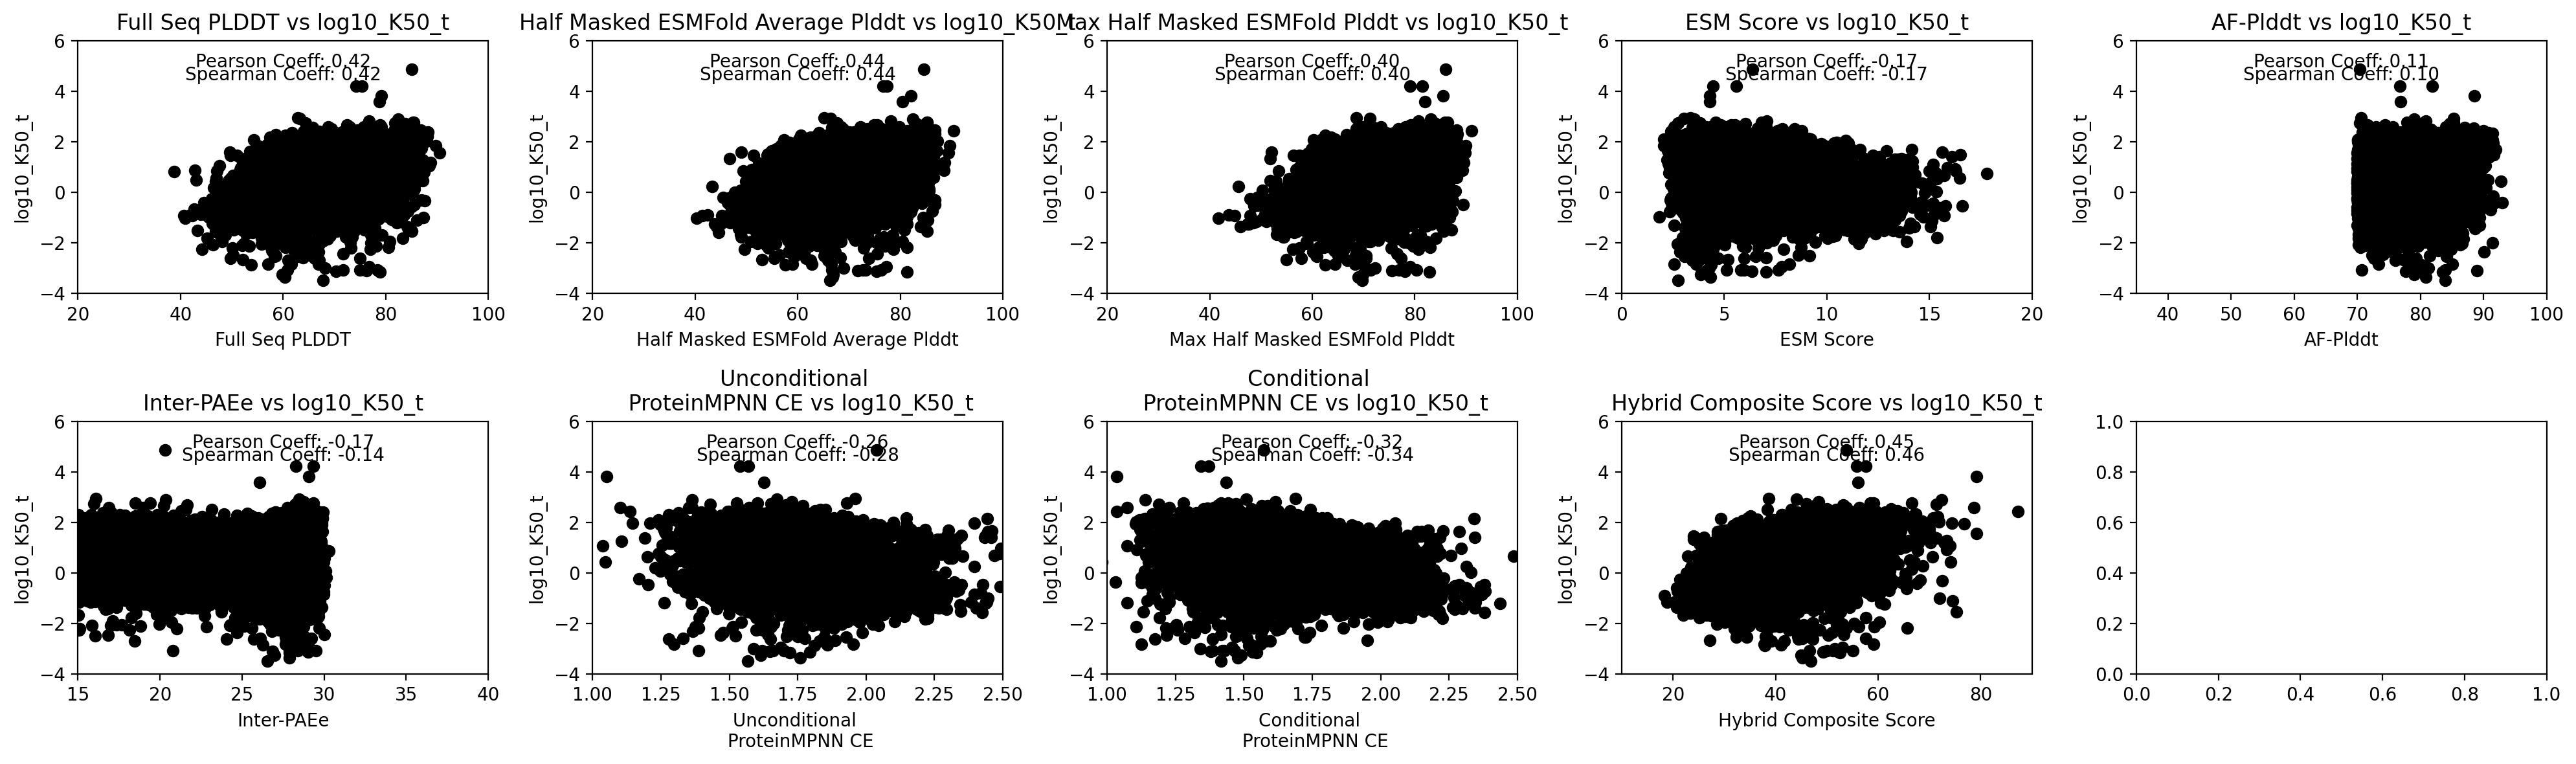

In [ ]:
K_t_p, K_t_s= plot_experiment_vs_computation(ylabel ='log10_K50_t')

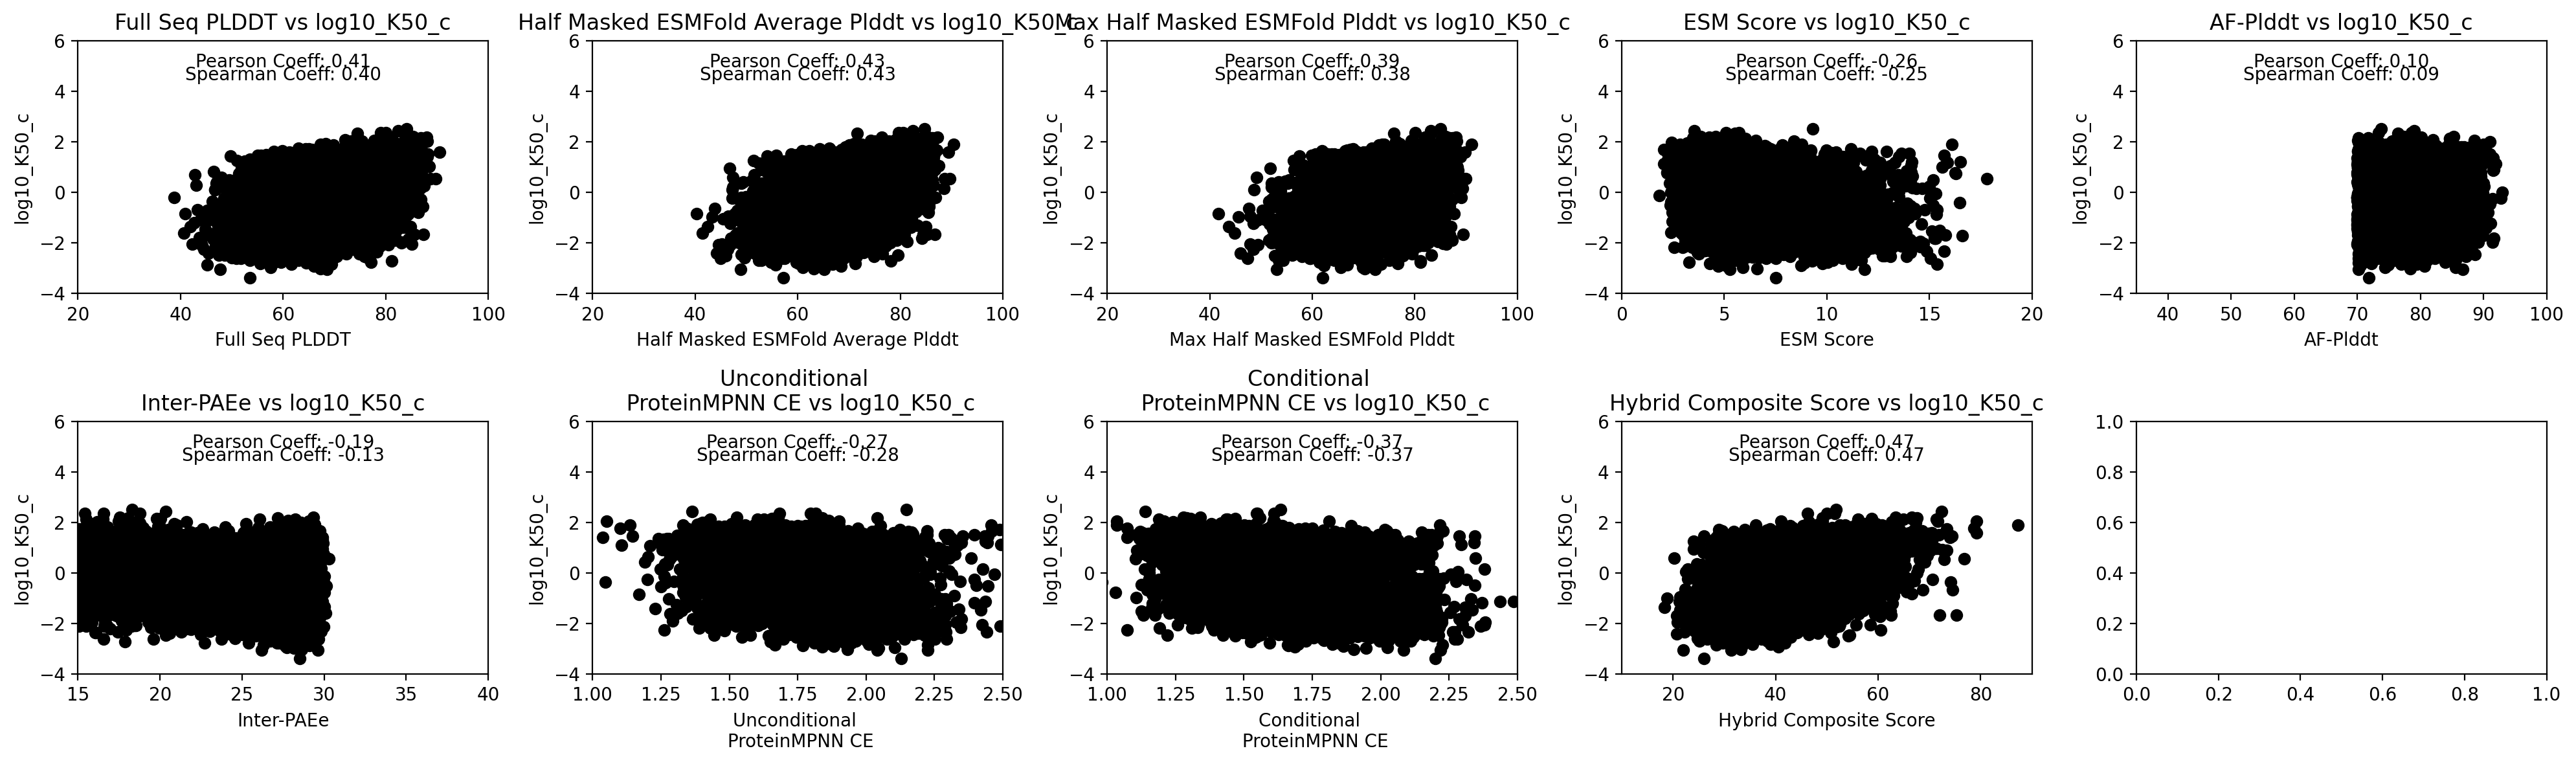

In [ ]:
K_c_p, K_c_s= plot_experiment_vs_computation(ylabel ='log10_K50_c')

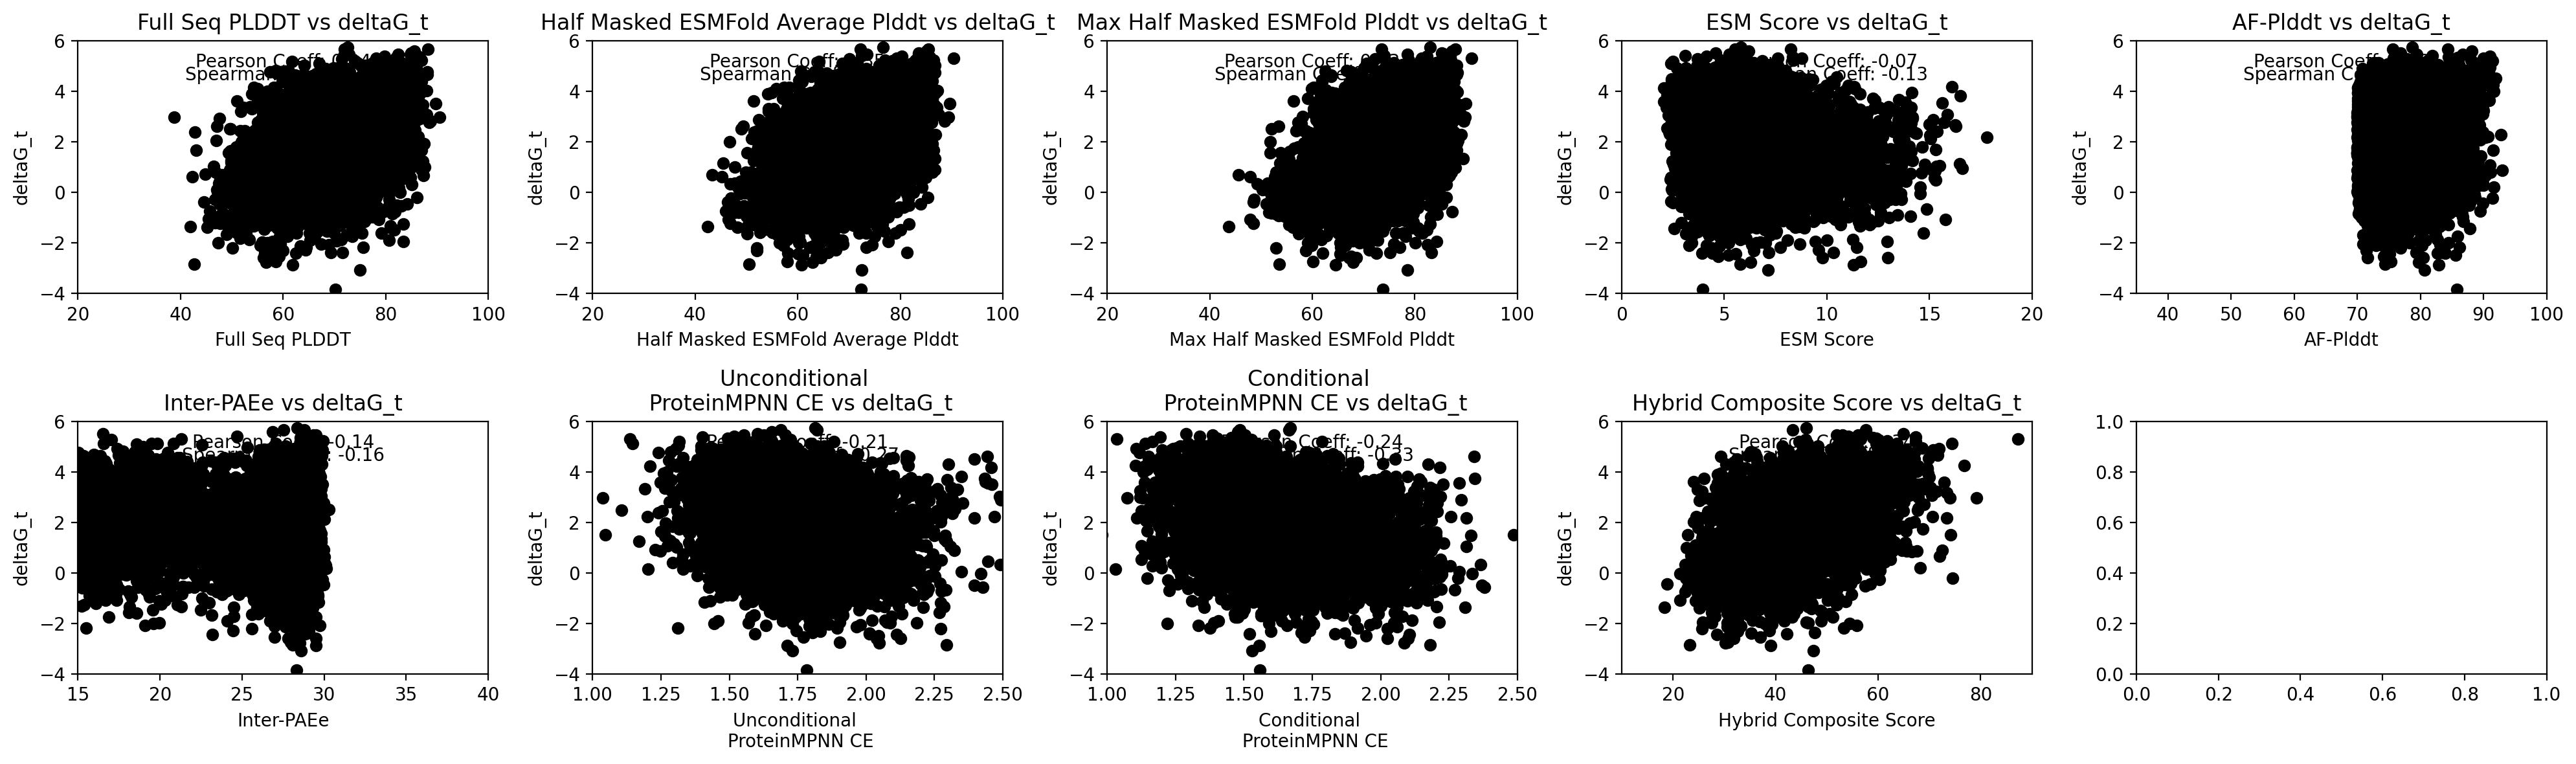

In [ ]:
G_t_p, G_t_s= plot_experiment_vs_computation(ylabel ='deltaG_t')

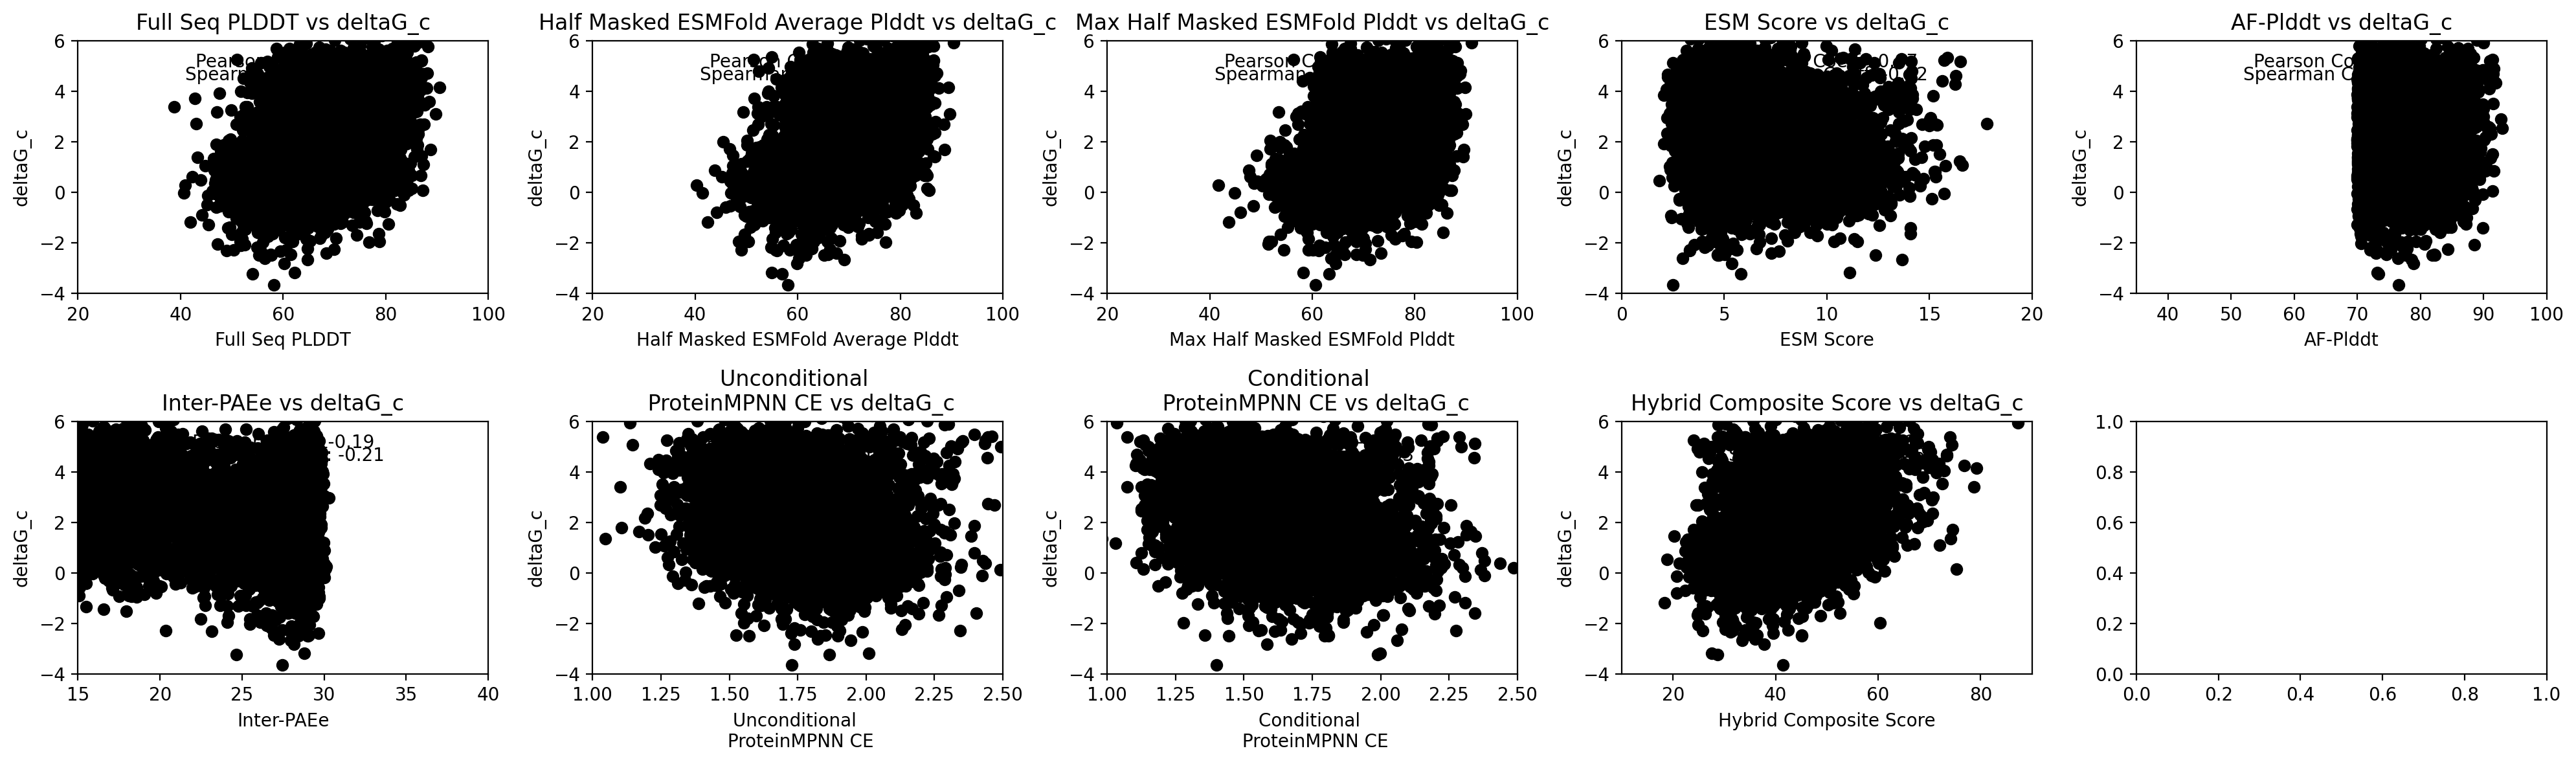

In [ ]:
G_c_p, G_c_s= plot_experiment_vs_computation(ylabel ='deltaG_c')

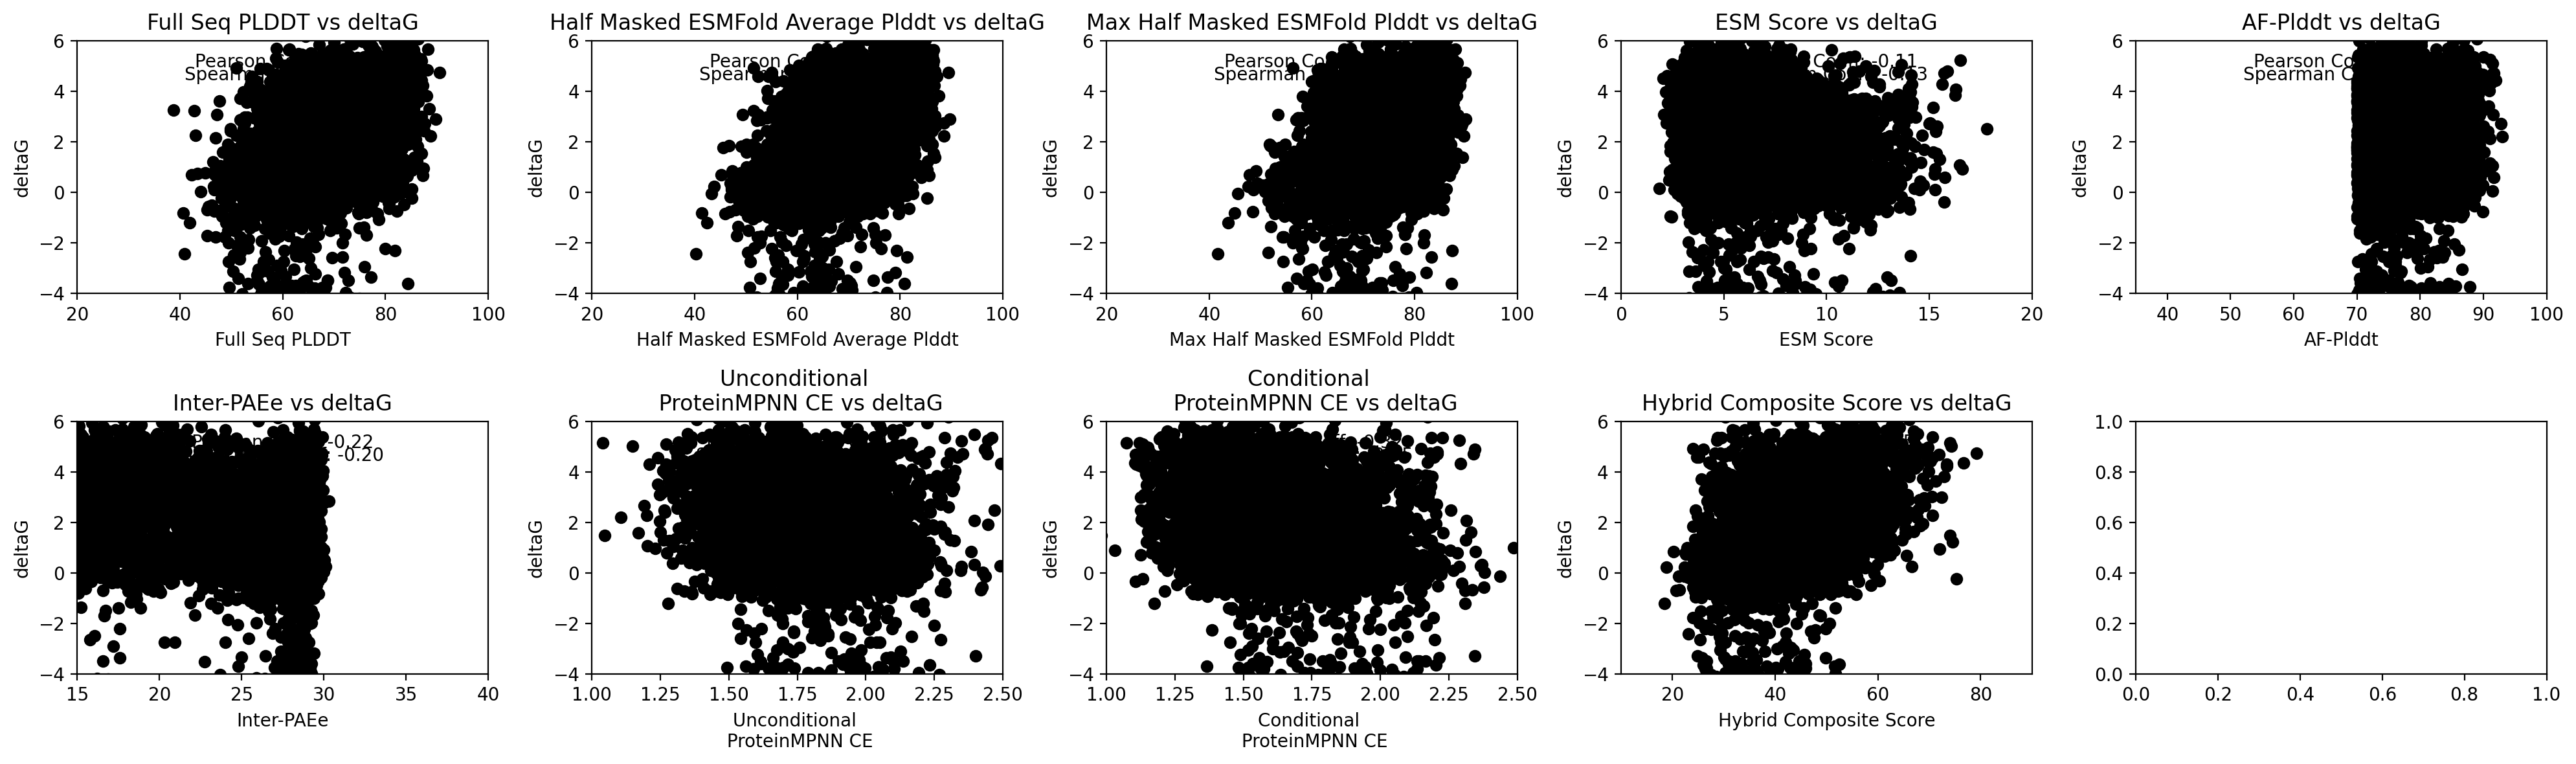

In [ ]:
G_p, G_s= plot_experiment_vs_computation(ylabel ='deltaG')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_groups = 5
bar_width = 0.1
index = np.arange(num_groups)

# Rainbow colormap
data_p = [K_t_p, K_c_p, G_t_p, G_c_p, G_p]
data_s = [K_t_s, K_c_s, G_t_s, G_c_s, G_s]

    
data_p = np.abs(np.array(data_p))
data_s = np.abs(np.array(data_s))

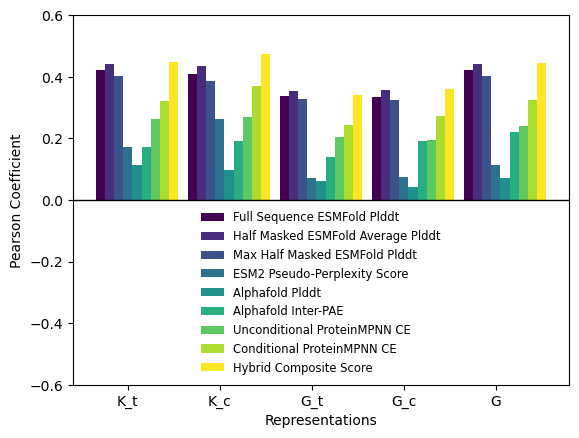

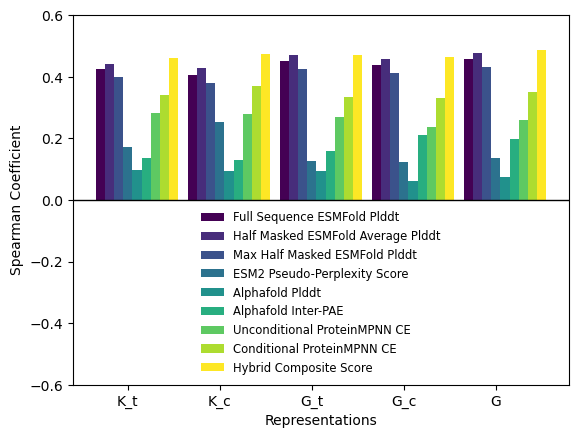

In [ ]:

# colors = plt.cm.rainbow(np.linspace(1, 0, 9))
colors = plt.cm.viridis(np.linspace(0, 1, 9))
# colors[-1] = [0.5, 0.5, 0.5, 1.0]

# Create grouped bar graph with pastel colors
plt.bar(index - 3 * bar_width, data_p[:, 0], bar_width, label='Full Sequence ESMFold Plddt', color =colors[0])
plt.bar(index - 2 * bar_width, data_p[:, 1], bar_width, label='Half Masked ESMFold Average Plddt', color =colors[1])
plt.bar(index - bar_width, data_p[:, 2], bar_width, label='Max Half Masked ESMFold Plddt', color =colors[2])
plt.bar(index, data_p[:, 3], bar_width, label='ESM2 Pseudo-Perplexity Score', color =colors[3])
plt.bar(index+bar_width, data_p[:, 4], bar_width, label='Alphafold Plddt', color =colors[4])
plt.bar(index + 2*bar_width, data_p[:, 5], bar_width, label='Alphafold Inter-PAE', color =colors[5])
plt.bar(index+3*bar_width, data_p[:, 6], bar_width, label='Unconditional ProteinMPNN CE', color =colors[6])
plt.bar(index + 4*bar_width, data_p[:, 7], bar_width, label='Conditional ProteinMPNN CE', color =colors[7])
plt.bar(index + 5*bar_width, data_p[:, 8], bar_width, label='Hybrid Composite Score', color =colors[8])

plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Customize the plot
plt.xlabel('Representations')
plt.ylabel('Pearson Coefficient')
plt.ylim([-0.6, 0.6])
# plt.title('Grouped Bar Graph for Different Stability Factors')
plt.xticks(index, ['K_t', 'K_c', 'G_t', 'G_c', 'G'])
plt.legend(loc="lower center", fontsize="small",  frameon = False)

# plt.savefig('figures/models_pearson_coefficient_viridis.png',  dpi=300)
# Show the plot
plt.show()


# Create grouped bar graph with pastel colors
plt.bar(index - 3 * bar_width, data_s[:, 0], bar_width, label='Full Sequence ESMFold Plddt', color =colors[0])
plt.bar(index - 2 * bar_width, data_s[:, 1], bar_width, label='Half Masked ESMFold Average Plddt', color =colors[1])
plt.bar(index - bar_width, data_s[:, 2], bar_width, label='Max Half Masked ESMFold Plddt', color =colors[2])
plt.bar(index, data_s[:, 3], bar_width, label='ESM2 Pseudo-Perplexity Score', color =colors[3])
plt.bar(index+bar_width, data_s[:, 4], bar_width, label='Alphafold Plddt', color =colors[4])
plt.bar(index + 2*bar_width, data_s[:, 5], bar_width, label='Alphafold Inter-PAE', color =colors[5])
plt.bar(index+3*bar_width, data_s[:, 6], bar_width, label='Unconditional ProteinMPNN CE', color =colors[6])
plt.bar(index + 4*bar_width, data_s[:, 7], bar_width, label='Conditional ProteinMPNN CE', color =colors[7])
plt.bar(index + 5*bar_width, data_s[:, 8], bar_width, label='Hybrid Composite Score', color =colors[8])

# Draw a black line at y=0
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Customize the plot
plt.xlabel('Representations')
plt.ylabel('Spearman Coefficient')
plt.ylim([-0.6, 0.6])
# plt.title('Grouped Bar Graph for Different Stability Factors')
plt.xticks(index, ['K_t', 'K_c', 'G_t', 'G_c', 'G'])
plt.legend(loc="lower center", fontsize="small", frameon = False)

# plt.savefig('figures/models_spearman_coefficient_viridis.png', dpi=300)
# Show the plot
plt.show()

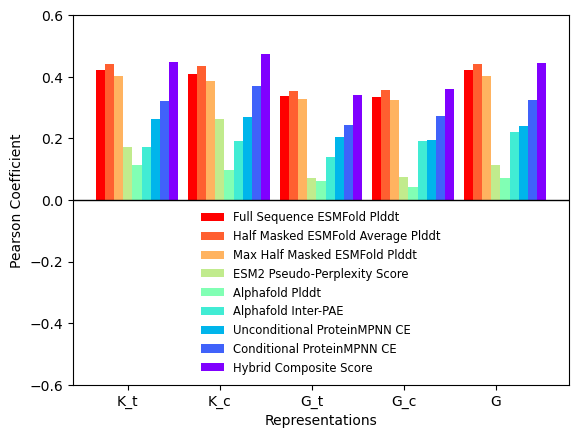

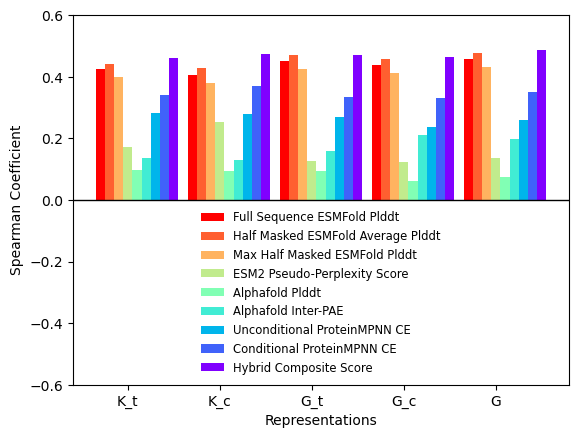

In [104]:

colors = plt.cm.rainbow(np.linspace(1, 0, 9))
# colors = plt.cm.viridis(np.linspace(0, 1, 9))
# colors[-1] = [0.5, 0.5, 0.5, 1.0]

# Create grouped bar graph with pastel colors
plt.bar(index - 3 * bar_width, data_p[:, 0], bar_width, label='Full Sequence ESMFold Plddt', color =colors[0])
plt.bar(index - 2 * bar_width, data_p[:, 1], bar_width, label='Half Masked ESMFold Average Plddt', color =colors[1])
plt.bar(index - bar_width, data_p[:, 2], bar_width, label='Max Half Masked ESMFold Plddt', color =colors[2])
plt.bar(index, data_p[:, 3], bar_width, label='ESM2 Pseudo-Perplexity Score', color =colors[3])
plt.bar(index+bar_width, data_p[:, 4], bar_width, label='Alphafold Plddt', color =colors[4])
plt.bar(index + 2*bar_width, data_p[:, 5], bar_width, label='Alphafold Inter-PAE', color =colors[5])
plt.bar(index+3*bar_width, data_p[:, 6], bar_width, label='Unconditional ProteinMPNN CE', color =colors[6])
plt.bar(index + 4*bar_width, data_p[:, 7], bar_width, label='Conditional ProteinMPNN CE', color =colors[7])
plt.bar(index + 5*bar_width, data_p[:, 8], bar_width, label='Hybrid Composite Score', color =colors[8])

plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Customize the plot
plt.xlabel('Representations')
plt.ylabel('Pearson Coefficient')
plt.ylim([-0.6, 0.6])
# plt.title('Grouped Bar Graph for Different Stability Factors')
plt.xticks(index, ['K_t', 'K_c', 'G_t', 'G_c', 'G'])
plt.legend(loc="lower center", fontsize="small",  frameon = False)

# plt.savefig('figures/models_pearson_coefficient_rainbow.png',  dpi=300)
# Show the plot
plt.show()


plt.bar(index - 3 * bar_width, data_s[:, 0], bar_width, label='Full Sequence ESMFold Plddt', color =colors[0])
plt.bar(index - 2 * bar_width, data_s[:, 1], bar_width, label='Half Masked ESMFold Average Plddt', color =colors[1])
plt.bar(index - bar_width, data_s[:, 2], bar_width, label='Max Half Masked ESMFold Plddt', color =colors[2])
plt.bar(index, data_s[:, 3], bar_width, label='ESM2 Pseudo-Perplexity Score', color =colors[3])
plt.bar(index+bar_width, data_s[:, 4], bar_width, label='Alphafold Plddt', color =colors[4])
plt.bar(index + 2*bar_width, data_s[:, 5], bar_width, label='Alphafold Inter-PAE', color =colors[5])
plt.bar(index+3*bar_width, data_s[:, 6], bar_width, label='Unconditional ProteinMPNN CE', color =colors[6])
plt.bar(index + 4*bar_width, data_s[:, 7], bar_width, label='Conditional ProteinMPNN CE', color =colors[7])
plt.bar(index + 5*bar_width, data_s[:, 8], bar_width, label='Hybrid Composite Score', color =colors[8])

# Draw a black line at y=0
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Customize the plot
plt.xlabel('Representations')
plt.ylabel('Spearman Coefficient')
plt.ylim([-0.6, 0.6])
# plt.title('Grouped Bar Graph for Different Stability Factors')
plt.xticks(index, ['K_t', 'K_c', 'G_t', 'G_c', 'G'])
plt.legend(loc="lower center", fontsize="small", frameon = False)

# plt.savefig('figures/models_spearman_coefficient_rainbow.png' , dpi=300)
# Show the plot
plt.show()

In [35]:
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt



def scatter_and_correlation_color_experiment_datapoint(ax, df, x_column, y_column, label_x, label_y, color_column, xlim=None, ylim=None):
    # Drop rows with NaN values in the specified columns
    df_no_nan = df[[x_column, y_column, color_column]].dropna()

    sc = ax.scatter(df_no_nan[x_column].tolist(), df_no_nan[y_column].tolist(), c=df_no_nan[color_column], cmap='bwr', marker='o', alpha=0.5, s=15)
    ax.set_title(f'{label_x} \n vs \n {label_y}')
    ax.set_xlabel(label_x, fontsize=12)
    ax.set_ylabel(label_y, fontsize=12)

    # Customize xlim and ylim if provided
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)

    # Calculate Pearson correlation coefficient
    pearson_coefficient, _ = pearsonr(df_no_nan[x_column], df_no_nan[y_column])

    # Calculate Spearman rank correlation coefficient
    spearman_coefficient, _ = spearmanr(df_no_nan[x_column], df_no_nan[y_column])

    # Add Pearson and Spearman correlation coefficients to the plot
    ax.text(0.5, 0.95, f"Pearson Coeff: {pearson_coefficient:.2f}", transform=ax.transAxes,
            horizontalalignment='center', verticalalignment='top', fontsize=12)
    ax.text(0.5, 0.90, f"Spearman Coeff: {spearman_coefficient:.2f}", transform=ax.transAxes,
            horizontalalignment='center', verticalalignment='top', fontsize=12)

    # Add colorbar
    cbar = plt.colorbar(sc, ax=ax, label='ΔG')

    return pearson_coefficient, spearman_coefficient

def plot_computation_vs_computation(ylabel ='log10_K50_t', save_dir=''):
    
    fig, axs = plt.subplots(2, 4, figsize=(20, 10), dpi=200)
    axs = axs.flatten()

    # Example usage for each subplot with customized xlim and ylim
    p1,s1=scatter_and_correlation_color_experiment_datapoint(axs[0], merged_df, 'Full Seq PLDDT', ylabel, 'Full Seq PLDDT', ylabel, 'deltaG')
    p3,s3=scatter_and_correlation_color_experiment_datapoint(axs[1], merged_df, 'Max Half Masked ESMFold Plddt', ylabel, 'Max Half Masked ESMFold Plddt', ylabel, 'deltaG')
    p4,s4=scatter_and_correlation_color_experiment_datapoint(axs[2], merged_df, 'ESM Score', ylabel, 'ESM Score', ylabel, 'deltaG')
    p5,s5=scatter_and_correlation_color_experiment_datapoint(axs[3], merged_df, 'AF_plddt', ylabel, 'AF-Plddt', ylabel, 'deltaG')
    p6,s6=scatter_and_correlation_color_experiment_datapoint(axs[4], merged_df, 'inter_pae',ylabel, 'Inter-PAE', ylabel, 'deltaG')
    p7,s7=scatter_and_correlation_color_experiment_datapoint(axs[5], merged_df, 'unconditional_CE', ylabel, 'Unconditional \n ProteinMPNN CE', ylabel, 'deltaG')
    p8,s8=scatter_and_correlation_color_experiment_datapoint(axs[6], merged_df, 'conditional_CE', ylabel, 'Conditional \n ProteinMPNN CE', ylabel, 'deltaG')
    p9,s9=scatter_and_correlation_color_experiment_datapoint(axs[7], merged_df, 'Hybrid Composite Score', ylabel, 'Hybrid Composite Score', ylabel, 'deltaG')

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    
    
    plt.savefig(save_dir, dpi=300)
    plt.show()


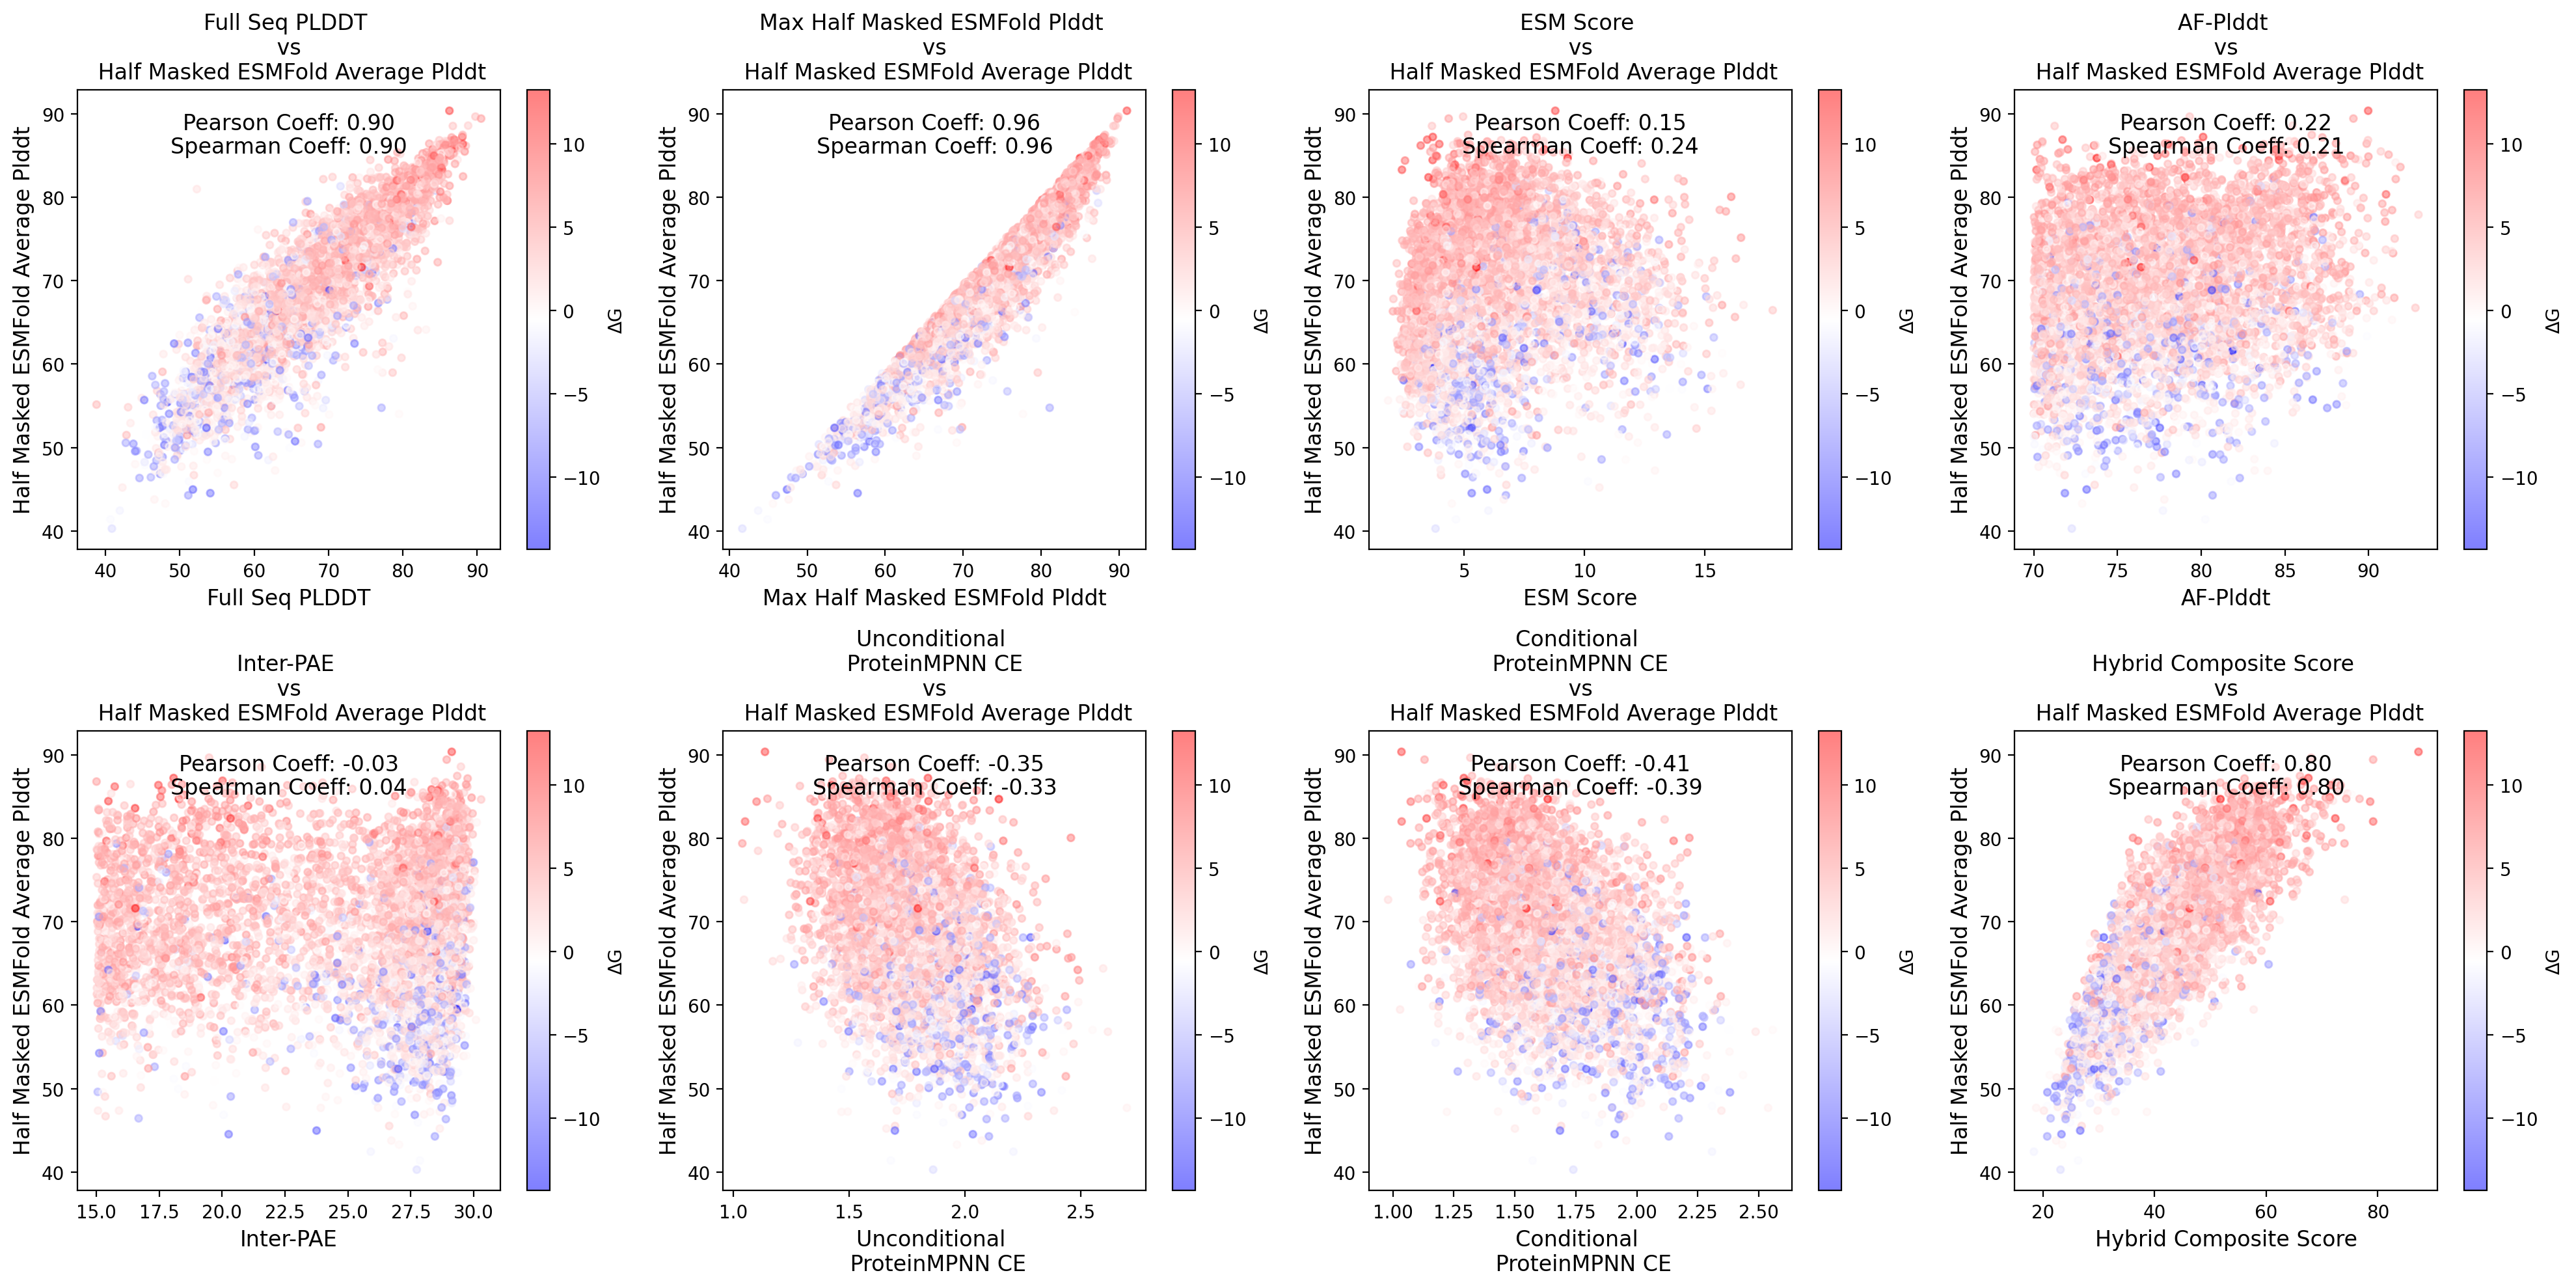

In [36]:
# plot_computation_vs_computation('Half Masked ESMFold Average Plddt', 'figures/one_to_one_model_correlation_figure.png')

In [95]:
merged_df[['ID', 'method']] = merged_df['name'].apply(lambda x: pd.Series(["_".join(x.split("_")[:2]), "_".join(x.split("_")[2:])]))

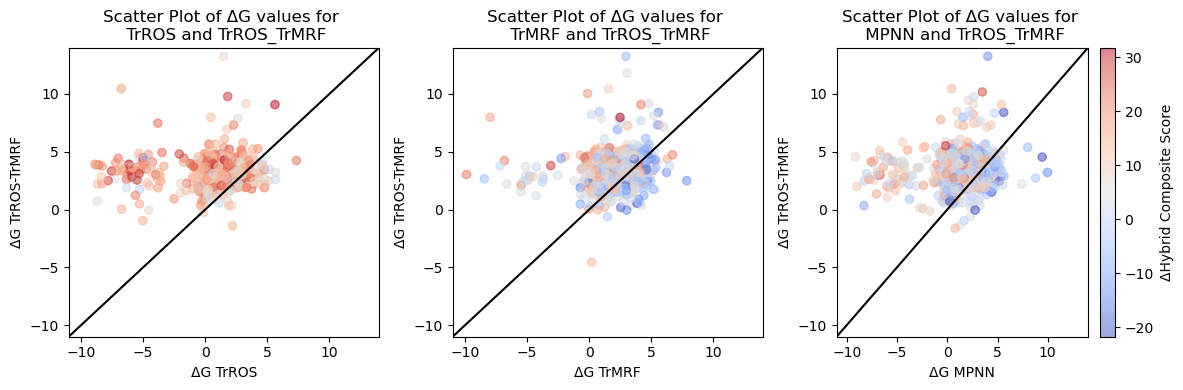

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
methods = ['TrROS', 'TrMRF', 'JUSTAS']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Initialize a variable to store the maximum PLDDT difference across all methods
max_PLDDT_diff = 0

for i, method in enumerate(methods):
    # Filter DataFrame for the current method
    df_A = merged_df[merged_df['method'] == method]
    df_B = merged_df[merged_df['method'] == 'TrROS_Hall']

    # Merge the DataFrames on 'ID' to get pairs of deltaG values for the same ID
    df_merged = pd.merge(df_A, df_B, on='ID', suffixes=('_' + method, '_TrROS_Hall'))

    # Calculate the difference of PLDDT values
    df_merged['PLDDT_diff'] = df_merged['Hybrid Composite Score_TrROS_Hall'] - df_merged['Hybrid Composite Score_' + method] 

    # Update max_PLDDT_diff
    max_PLDDT_diff = max(max_PLDDT_diff, df_merged['PLDDT_diff'].abs().max())

    # Create a scatter plot with color based on PLDDT difference
    scatter = axes[i].scatter(
        x=df_merged['deltaG_' + method],
        y=df_merged['deltaG_TrROS_Hall'],
        c=df_merged['PLDDT_diff'],  # Color based on PLDDT difference
        cmap='coolwarm',  # Choose a colormap
        marker='o',
        vmin=-max_PLDDT_diff+20,  # Set the minimum value for the color scale
        vmax=max_PLDDT_diff-10,   # Set the maximum value for the color scale
        alpha = 0.5
    )

    # Set limits
    axes[i].set_xlim(-11, 14)
    axes[i].set_ylim(-11, 14)
    axes[i].plot([-11, 14], [-11, 14], color="black")

    if method == 'JUSTAS':
        method = 'MPNN'
        # Customize the plot
    axes[i].set_title(f'Scatter Plot of ΔG values for \n {method} and TrROS_TrMRF')
    axes[i].set_xlabel(f'ΔG {method}')
    axes[i].set_ylabel('ΔG TrROS-TrMRF')
    
    
cbar = plt.colorbar(scatter, ax=axes[2], orientation='vertical',  pad=0.04)
cbar.set_label('ΔHybrid Composite Score')

# Show the plots
plt.tight_layout()
# plt.savefig('figures/joint_vs_single_models_deltaG.png', dpi=300)
plt.show()

## TMscore

In [23]:
len(merged_df)

5439

In [88]:
file_name = 'dataset/DMSV2_TMscore.txt'

# Read the file and store each line as a list in a new list
with open(file_name, 'r') as file:
    lines = file.readlines()

# Convert each line (string) to a list and store all lists in a new list
lists_from_file = [eval(line.strip())[0] for line in lines]
files = [[name[0].replace('_unrelaxed_model_1.pdb', ''), name[1].replace('_unrelaxed_model_1.pdb', ''), float(name[2][0])] for name in lists_from_file]

In [89]:
# Create a dictionary to store proteins with the same prefix
protein_dict = {}

# Iterate through each protein ID
for protein_id in files:
    tmp = protein_id[0].split("_")
    prefix, method = "_".join(tmp[:2]), "_".join(tmp[2:])
    
    # Check if the prefix is already a key in the dictionary
    if prefix in protein_dict:
        protein_dict[prefix].append(protein_id)
    else:
        protein_dict[prefix] = [protein_id]

# # Filter the dictionary to keep only entries with exactly four items in the list
filtered_protein_dict = {key: value for key, value in protein_dict.items() if len(value) == 6}

# # Flatten the list of proteins from the filtered dictionary


filtered_proteins = np.array([protein for proteins in filtered_protein_dict.values() for protein in proteins])

In [90]:
# Assuming df_plddt70 is your DataFrame
df_plddt70_names = set(merged_df['name'])

filtered_proteins_df = pd.DataFrame(filtered_proteins, columns=['name1', 'name2', 'tmscore'])

# Filter rows based on whether both 'col1' and 'col2' are in df_plddt70_names
filtered_rows = filtered_proteins_df[
    (filtered_proteins_df['name1'].isin(df_plddt70_names)) &
    (filtered_proteins_df['name2'].isin(df_plddt70_names))
]

filtered_rows_array = filtered_rows.to_numpy()

result_dict = {}

for row in filtered_rows_array:
    key = row[0].split('_')[0] + '_' + row[0].split('_')[1]
    
    if key not in result_dict:
        result_dict[key] = []
    
    result_dict[key].append(float(row[2]))
    
    
tm_score_above_70_set= []
for key in result_dict.keys():
    if np.sum(np.array(result_dict[key])<0.7)==0:
        tm_score_above_70_set.append(key)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


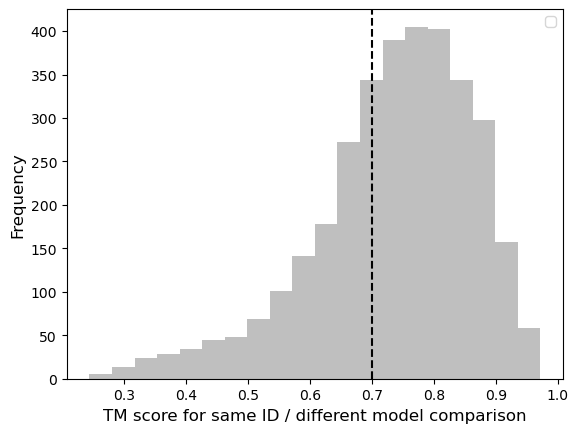

In [91]:
## for 5757 ID that includes all 4 model sequences 
tm_score = [float(item[2]) for item in filtered_rows_array]
plt.hist(tm_score,  bins = 20, alpha = 0.5, color='grey')
plt.axvline(x=0.7, color='black', linestyle='--')
plt.xlabel("TM score for same ID / different model comparison", fontsize= 12)
plt.ylabel("Frequency", fontsize =12)
plt.legend()

# plt.savefig('figures/tmscore_hist.png', dpi=300)
            
plt.show()

In [92]:
df_plddt70_names = set(merged_df['name'])

filtered_rows_names = set(np.concatenate((filtered_rows_array[:, 0], filtered_rows_array[:, 1])))

names_to_exclude = df_plddt70_names - filtered_rows_names

# # Filter df_plddt70 based on the exclusion condition
filtered_df = merged_df[~merged_df['name'].isin(names_to_exclude)]
filtered_rows['tmscore'] = filtered_rows['tmscore'].astype(float)

/state/partition1/slurm_tmp/24766414.0.0/ipykernel_891062/3914770505.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows['tmscore'] = filtered_rows['tmscore'].astype(float)


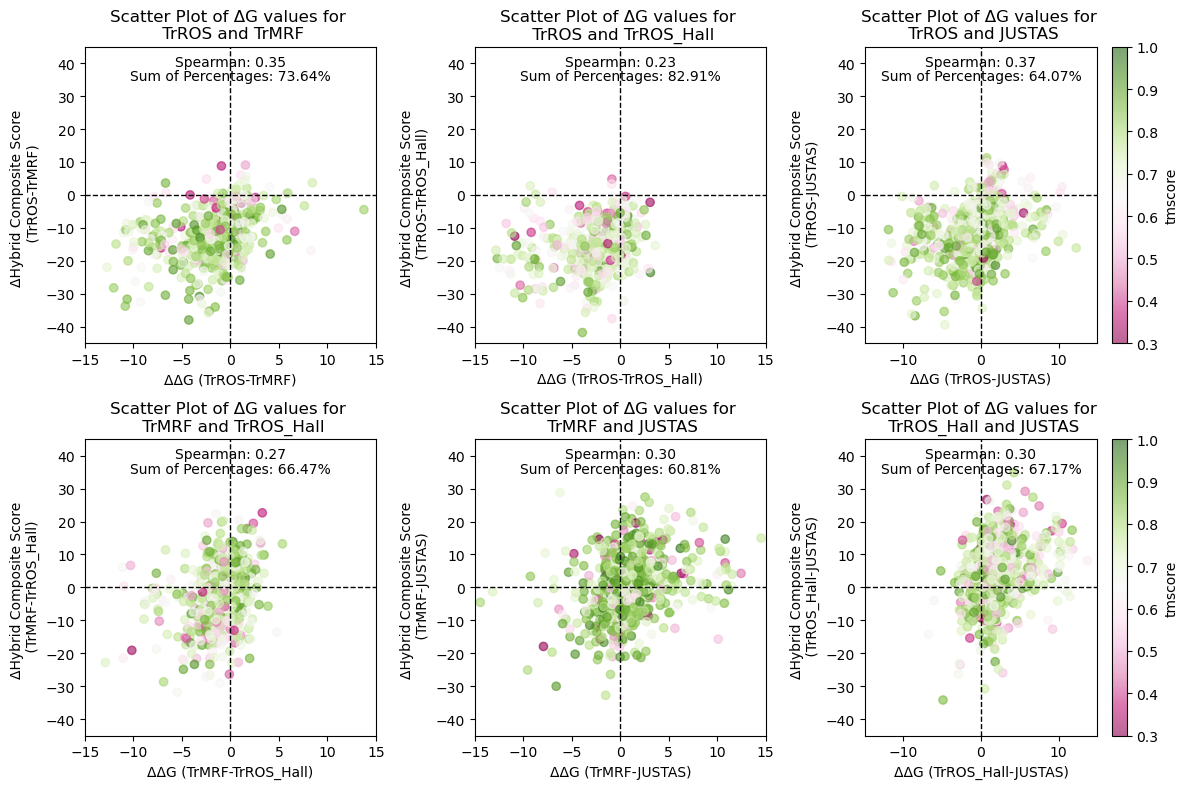

[0.3454214240597827, 0.22752586058643054, 0.36823245166537727, 0.27255914683660354, 0.30050454690329764, 0.297641577394734]


In [37]:
from itertools import combinations
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr

methods = ['TrROS', 'TrMRF', 'TrROS_Hall', 'JUSTAS']
combinations_of_methods = list(combinations(methods, 2))  # Get all combinations of 2 methods

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Initialize a variable to store the maximum PLDDT difference across all methods
max_PLDDT_diff = 0
spearman_coefficients = []

for i, (method1, method2) in enumerate(combinations_of_methods):
    # Filter DataFrame for the current combination of methods
    df_method1 = merged_df[merged_df['method'] == method1]
    df_method2 = merged_df[merged_df['method'] == method2]

    # Merge the DataFrames on 'ID' to get pairs of deltaG values for the same ID
    df_merged = pd.merge(df_method1, df_method2, on='ID', suffixes=(f'_{method1}', f'_{method2}'))

    merge1 = pd.merge(df_merged, filtered_rows[['name1', 'name2', 'tmscore']], 
                      how='left', 
                      left_on=[f'name_{method1}', f'name_{method2}'], 
                      right_on=['name1', 'name2'])

    # Second merge
    merge2 = pd.merge(df_merged, filtered_rows[['name1', 'name2', 'tmscore']], 
                      how='left', 
                      left_on=[f'name_{method1}', f'name_{method2}'], 
                      right_on=['name2', 'name1'])


    df_merged = merge1.combine_first(merge2)
        # Calculate the difference of PLDDT values
    df_merged['PLDDT_diff'] = df_merged[f'Hybrid Composite Score_{method1}'] - df_merged[f'Hybrid Composite Score_{method2}']

    # Update max_PLDDT_diff
    max_PLDDT_diff = max(max_PLDDT_diff, df_merged['PLDDT_diff'].abs().max())

    # Create a scatter plot without color
    scatter = axes[i // 3, i % 3].scatter(
        x=df_merged[f'deltaG_{method1}'] - df_merged[f'deltaG_{method2}'],
        y=df_merged[f'Hybrid Composite Score_{method1}'] - df_merged[f'Hybrid Composite Score_{method2}'],
        c=df_merged['tmscore'],
        marker='o',
        alpha=0.6,
        cmap='PiYG',
        vmin=0.3,  # Set the minimum value for the color scale
        vmax=1,   # Set the maximum value for the color scale
    )

    # Set limits
    axes[i // 3, i % 3].set_xlim(-15, 15)
    axes[i // 3, i % 3].set_ylim(-45, 45)

    # Customize the plot
    
        
    axes[i // 3, i % 3].set_title(f'Scatter Plot of ΔG values for \n {method1} and {method2}')
    axes[i // 3, i % 3].set_xlabel(f'ΔΔG ({method1}-{method2})')
    axes[i // 3, i % 3].set_ylabel(f'ΔHybrid Composite Score \n ({method1}-{method2})')

    spearman_coefficient, _ = spearmanr(df_merged[f'deltaG_{method1}'] - df_merged[f'deltaG_{method2}'],
                                         df_merged[f'Hybrid Composite Score_{method1}'] - df_merged[f'Hybrid Composite Score_{method2}'])
    spearman_coefficients.append(spearman_coefficient)

    # Add Spearman coefficient as text annotation
    axes[i // 3, i % 3].text(0.5, 0.95, f'Spearman: {spearman_coefficient:.2f}', transform=axes[i // 3, i % 3].transAxes,
                             ha='center', va='center')
    axes[i // 3, i % 3].axhline(0, color='black', linestyle='--', linewidth=1)
    axes[i // 3, i % 3].axvline(0, color='black', linestyle='--', linewidth=1)

    positive_positive = df_merged[
        (df_merged[f'deltaG_{method1}'] - df_merged[f'deltaG_{method2}'] > 0) &
        (df_merged[f'Hybrid Composite Score_{method1}'] - df_merged[f'Hybrid Composite Score_{method2}'] > 0)].shape[0]
    negative_negative = df_merged[
        (df_merged[f'deltaG_{method1}'] - df_merged[f'deltaG_{method2}'] < 0) &
        (df_merged[f'Hybrid Composite Score_{method1}'] - df_merged[f'Hybrid Composite Score_{method2}'] < 0)].shape[0]

    total_items = df_merged.shape[0]
    percentage_positive_positive = (positive_positive / total_items) * 100
    percentage_negative_negative = (negative_negative / total_items) * 100

    sum_percentage = percentage_positive_positive + percentage_negative_negative

    # Add sum of percentages as text annotation
    axes[i // 3, i % 3].text(0.5, 0.90, f'Sum of Percentages: {sum_percentage:.2f}%',
                             transform=axes[i // 3, i % 3].transAxes, ha='center', va='center', color='black' )

# Show the plots
cbar = plt.colorbar(scatter, ax=axes[0,2])
cbar.set_label('tmscore')
cbar = plt.colorbar(scatter, ax=axes[1,2])
cbar.set_label('tmscore')
plt.tight_layout()
# plt.savefig('figures/compare_6_models_ddG_dHybrid_score_colored_by_TM', dpi=300)
plt.show()
print(spearman_coefficients)


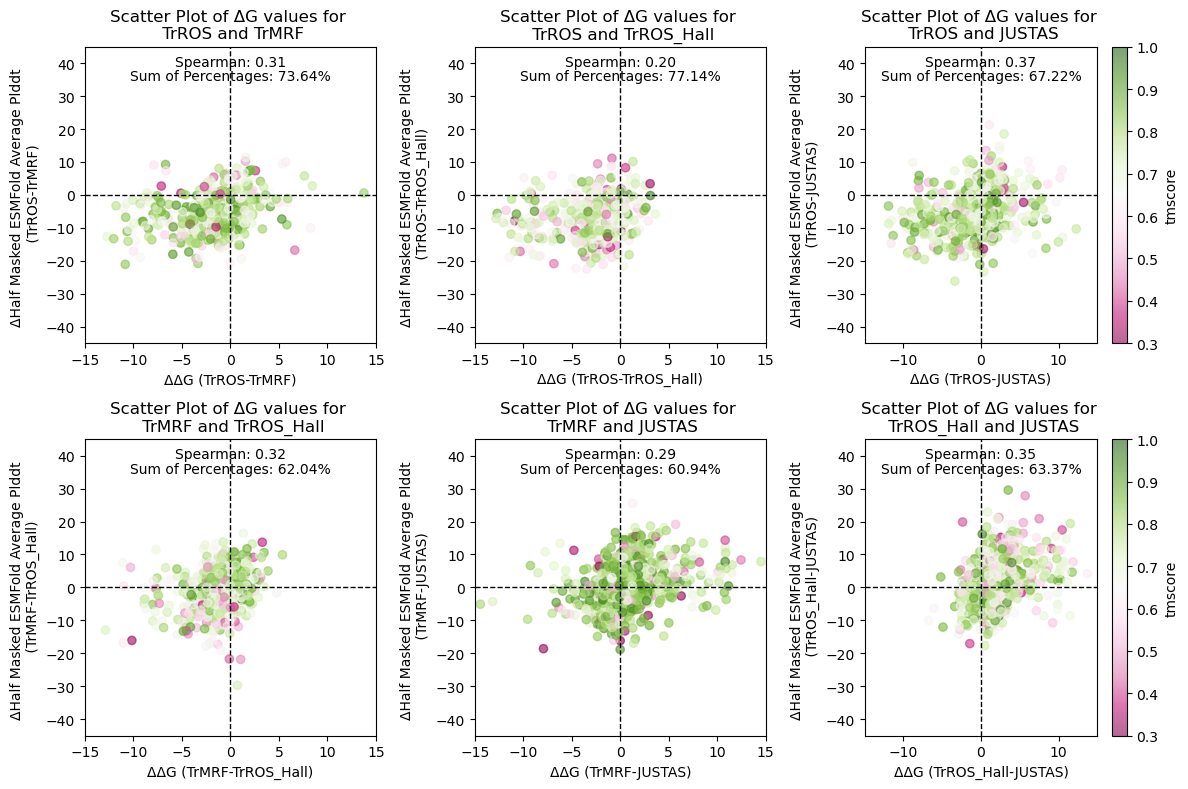

[0.3148179998535709, 0.20104957473536406, 0.36655032446955543, 0.3161479748184951, 0.28862850546359725, 0.35048680691781564]


In [38]:
from itertools import combinations
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr

methods = ['TrROS', 'TrMRF', 'TrROS_Hall', 'JUSTAS']
combinations_of_methods = list(combinations(methods, 2))  # Get all combinations of 2 methods

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Initialize a variable to store the maximum PLDDT difference across all methods
max_PLDDT_diff = 0
spearman_coefficients = []

for i, (method1, method2) in enumerate(combinations_of_methods):
    # Filter DataFrame for the current combination of methods
    df_method1 = merged_df[merged_df['method'] == method1]
    df_method2 = merged_df[merged_df['method'] == method2]

    # Merge the DataFrames on 'ID' to get pairs of deltaG values for the same ID
    df_merged = pd.merge(df_method1, df_method2, on='ID', suffixes=(f'_{method1}', f'_{method2}'))

    merge1 = pd.merge(df_merged, filtered_rows[['name1', 'name2', 'tmscore']], 
                      how='left', 
                      left_on=[f'name_{method1}', f'name_{method2}'], 
                      right_on=['name1', 'name2'])

    # Second merge
    merge2 = pd.merge(df_merged, filtered_rows[['name1', 'name2', 'tmscore']], 
                      how='left', 
                      left_on=[f'name_{method1}', f'name_{method2}'], 
                      right_on=['name2', 'name1'])


    df_merged = merge1.combine_first(merge2)
        # Calculate the difference of PLDDT values
    df_merged['PLDDT_diff'] = df_merged[f'Half Masked ESMFold Average Plddt_{method1}'] - df_merged[f'Half Masked ESMFold Average Plddt_{method2}']

    # Update max_PLDDT_diff
    max_PLDDT_diff = max(max_PLDDT_diff, df_merged['PLDDT_diff'].abs().max())

    # Create a scatter plot without color
    scatter = axes[i // 3, i % 3].scatter(
        x=df_merged[f'deltaG_{method1}'] - df_merged[f'deltaG_{method2}'],
        y=df_merged[f'Half Masked ESMFold Average Plddt_{method1}'] - df_merged[f'Half Masked ESMFold Average Plddt_{method2}'],
        c=df_merged['tmscore'],
        marker='o',
        alpha=0.6,
        cmap='PiYG',
        vmin=0.3,  # Set the minimum value for the color scale
        vmax=1,   # Set the maximum value for the color scale
    )

    # Set limits
    axes[i // 3, i % 3].set_xlim(-15, 15)
    axes[i // 3, i % 3].set_ylim(-45, 45)

    # Customize the plot
    
        
    axes[i // 3, i % 3].set_title(f'Scatter Plot of ΔG values for \n {method1} and {method2}')
    axes[i // 3, i % 3].set_xlabel(f'ΔΔG ({method1}-{method2})')
    axes[i // 3, i % 3].set_ylabel(f'ΔHalf Masked ESMFold Average Plddt \n ({method1}-{method2})')

    spearman_coefficient, _ = spearmanr(df_merged[f'deltaG_{method1}'] - df_merged[f'deltaG_{method2}'],
                                         df_merged[f'Half Masked ESMFold Average Plddt_{method1}'] - df_merged[f'Half Masked ESMFold Average Plddt_{method2}'])
    spearman_coefficients.append(spearman_coefficient)

    # Add Spearman coefficient as text annotation
    axes[i // 3, i % 3].text(0.5, 0.95, f'Spearman: {spearman_coefficient:.2f}', transform=axes[i // 3, i % 3].transAxes,
                             ha='center', va='center')
    axes[i // 3, i % 3].axhline(0, color='black', linestyle='--', linewidth=1)
    axes[i // 3, i % 3].axvline(0, color='black', linestyle='--', linewidth=1)

    positive_positive = df_merged[
        (df_merged[f'deltaG_{method1}'] - df_merged[f'deltaG_{method2}'] > 0) &
        (df_merged[f'Half Masked ESMFold Average Plddt_{method1}'] - df_merged[f'Half Masked ESMFold Average Plddt_{method2}'] > 0)].shape[0]
    negative_negative = df_merged[
        (df_merged[f'deltaG_{method1}'] - df_merged[f'deltaG_{method2}'] < 0) &
        (df_merged[f'Half Masked ESMFold Average Plddt_{method1}'] - df_merged[f'Half Masked ESMFold Average Plddt_{method2}'] < 0)].shape[0]

    total_items = df_merged.shape[0]
    percentage_positive_positive = (positive_positive / total_items) * 100
    percentage_negative_negative = (negative_negative / total_items) * 100

    sum_percentage = percentage_positive_positive + percentage_negative_negative

    # Add sum of percentages as text annotation
    axes[i // 3, i % 3].text(0.5, 0.90, f'Sum of Percentages: {sum_percentage:.2f}%',
                             transform=axes[i // 3, i % 3].transAxes, ha='center', va='center', color='black' )

# Show the plots
cbar = plt.colorbar(scatter, ax=axes[0,2])
cbar.set_label('tmscore')
cbar = plt.colorbar(scatter, ax=axes[1,2])
cbar.set_label('tmscore')
plt.tight_layout()
# plt.savefig('figures/compare_6_models_ddG_dHM_plddt_colored_by_TM.png', dpi =300)
plt.show()
print(spearman_coefficients)


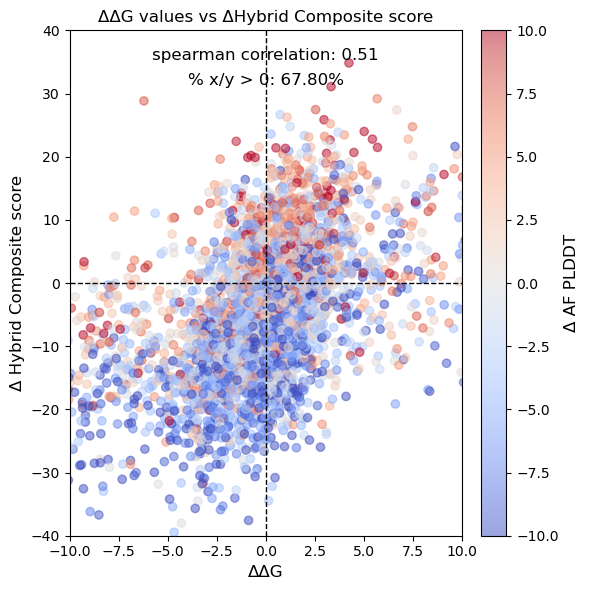

0.5069719670459362


In [52]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr
from itertools import combinations

methods = ['TrROS', 'TrMRF', 'TrROS_Hall', 'JUSTAS']
combinations_of_methods = list(combinations(methods, 2))  # Get all combinations of 2 methods

# Create an empty DataFrame to store concatenated data
combined_df = pd.DataFrame()

# Initialize a variable to store the maximum PLDDT difference across all methods
max_PLDDT_diff = 0
spearman_coefficients = []
positive_percentage = 0
negative_percentage = 0

# Concatenate all combinations into one DataFrame
for i, (method1, method2) in enumerate(combinations_of_methods):
    # Filter DataFrame for the current combination of methods
    df_method1 = merged_df[merged_df['method'] == method1]
    df_method2 = merged_df[merged_df['method'] == method2]

    # Merge the DataFrames on 'ID' to get pairs of deltaG values for the same ID
    df_merged = pd.merge(df_method1, df_method2, on='ID', suffixes=(f'_{method1}', f'_{method2}'))

    # Rename columns to have consistent names
    df_merged.rename(columns={
        f'deltaG_{method1}': 'deltaG',
        f'deltaG_{method2}': 'deltaG_other',
        f'Hybrid Composite Score_{method1}': 'Hybrid Composite Score',
        f'Hybrid Composite Score_{method2}': 'Hybrid Composite Score_other',
        f'AF_plddt_{method1}': 'AF_plddt',
        f'AF_plddt_{method2}': 'AF_plddt_other',
    }, inplace=True)

    # Calculate the difference of PLDDT values
    df_merged['PLDDT_diff'] = df_merged['AF_plddt'] - df_merged['AF_plddt_other']

    # Concatenate into the combined DataFrame
    combined_df = pd.concat([combined_df, df_merged])

    # Update max_PLDDT_diff
    max_PLDDT_diff = max(max_PLDDT_diff, df_merged['PLDDT_diff'].abs().max())

# Create a single scatter plot for all combinations
fig, ax = plt.subplots(figsize=(6, 6))

# Scatter plot with color based on positive/negative differences
scatter = ax.scatter(
    x=combined_df['deltaG'] - combined_df['deltaG_other'],
    y=combined_df['Hybrid Composite Score'] - combined_df['Hybrid Composite Score_other'],  
    marker='o',
    alpha=0.5,
    c=combined_df['PLDDT_diff'],  # Color based on PLDDT difference
    cmap='coolwarm',  # Choose a colormap
    vmin=-10,  # Set the minimum value for the color scale
    vmax=10,   # Set the maximum value for the color scale
)

# Customize the plot
ax.set_xlim(-10, 10)
ax.set_ylim(-40, 40)
ax.set_title('ΔΔG values vs ΔHybrid Composite score', fontsize = 12)
ax.set_xlabel('ΔΔG', fontsize = 12)
ax.set_ylabel('Δ Hybrid Composite score', fontsize = 12)
ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.axvline(0, color='black', linestyle='--', linewidth=1)
# Add Spearman coefficient as text annotation
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical',  pad=0.04)
cbar.set_label('Δ AF PLDDT', fontsize = 12)

spearman_coefficient, _ = spearmanr(combined_df['deltaG'] - combined_df['deltaG_other'],
                                         combined_df['Hybrid Composite Score'] - combined_df['Hybrid Composite Score_other'])



positive_positive = combined_df[
    (combined_df['deltaG'] - combined_df['deltaG_other'] > 0) &
    (combined_df['Hybrid Composite Score'] - combined_df['Hybrid Composite Score_other'] > 0)].shape[0]
negative_negative = combined_df[
    (combined_df['deltaG'] - combined_df['deltaG_other'] < 0) &
    (combined_df['Hybrid Composite Score'] - combined_df['Hybrid Composite Score_other'] < 0)].shape[0]

total_items = combined_df.shape[0]

percentage_positive_positive = (positive_positive / total_items) * 100
percentage_negative_negative = (negative_negative / total_items) * 100
    
ax.text(0.5, 0.95, f'spearman correlation: {(spearman_coefficient):.2f}', transform=ax.transAxes,
        ha='center', va='center', fontsize=12)
    
sum_percentage = percentage_positive_positive + percentage_negative_negative

ax.text(0.5, 0.90, f'% x/y > 0: {sum_percentage:.2f}%', transform=ax.transAxes,
        ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()
# plt.savefig('figures/overall_ddG_vs_dscore.png', dpi =300)
plt.show()

print(spearman_coefficient)



/state/partition1/slurm_tmp/24758904.0.0/ipykernel_1060661/4075492637.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_tmscore.rename(columns={
/state/partition1/slurm_tmp/24758904.0.0/ipykernel_1060661/4075492637.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_tmscore['PLDDT_diff'] = df_high_tmscore['AF_plddt'] - df_high_tmscore['AF_plddt_other']
/state/partition1/slurm_tmp/24758904.0.0/ipykernel_1060661/4075492637.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

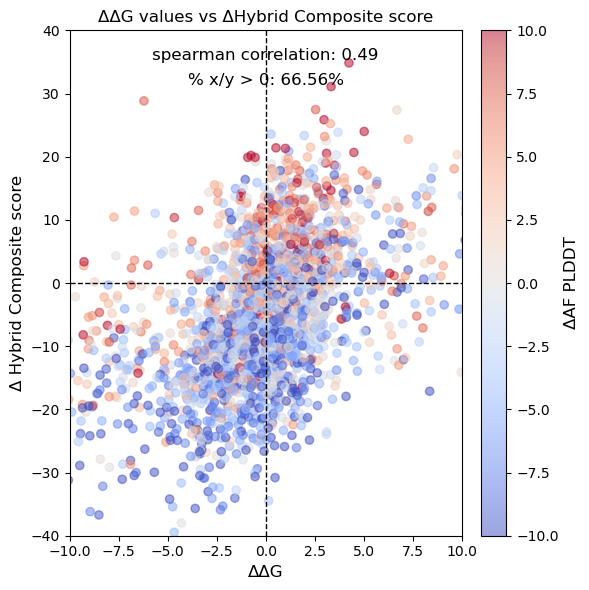

0.4908190839317732


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr
from itertools import combinations

methods = ['TrROS', 'TrMRF', 'TrROS_Hall', 'JUSTAS']
combinations_of_methods = list(combinations(methods, 2))  # Get all combinations of 2 methods

# Create an empty DataFrame to store concatenated data
combined_df = pd.DataFrame()

# Initialize a variable to store the maximum PLDDT difference across all methods
max_PLDDT_diff = 0
spearman_coefficients = []
positive_percentage = 0
negative_percentage = 0

# Concatenate all combinations into one DataFrame
for i, (method1, method2) in enumerate(combinations_of_methods):
    # Filter DataFrame for the current combination of methods
    df_method1 = merged_df[merged_df['method'] == method1]
    df_method2 = merged_df[merged_df['method'] == method2]

    # Merge the DataFrames on 'ID' to get pairs of deltaG values for the same ID
    df_merged = pd.merge(df_method1, df_method2, on='ID', suffixes=(f'_{method1}', f'_{method2}'))


    merge1 = pd.merge(df_merged, filtered_rows[['name1', 'name2', 'tmscore']], 
                      how='left', 
                      left_on=[f'name_{method1}', f'name_{method2}'], 
                      right_on=['name1', 'name2'])

    # Second merge
    merge2 = pd.merge(df_merged, filtered_rows[['name1', 'name2', 'tmscore']], 
                      how='left', 
                      left_on=[f'name_{method1}', f'name_{method2}'], 
                      right_on=['name2', 'name1'])

    df_merged = merge1.combine_first(merge2)

    # Filter the DataFrame based on tmscore values >= 0.7
    df_high_tmscore = df_merged[df_merged['tmscore'] >= 0.7]

    # Rename columns to have consistent names
    df_high_tmscore.rename(columns={
        f'deltaG_{method1}': 'deltaG',
        f'deltaG_{method2}': 'deltaG_other',
        f'Hybrid Composite Score_{method1}': 'Hybrid Composite Score',
        f'Hybrid Composite Score_{method2}': 'Hybrid Composite Score_other',
        f'AF_plddt_{method1}': 'AF_plddt',
        f'AF_plddt_{method2}': 'AF_plddt_other',
    }, inplace=True)

    # Calculate the difference of PLDDT values
    df_high_tmscore['PLDDT_diff'] = df_high_tmscore['AF_plddt'] - df_high_tmscore['AF_plddt_other']

    # Concatenate into the combined DataFrame
    combined_df = pd.concat([combined_df, df_high_tmscore])

    # Update max_PLDDT_diff
    max_PLDDT_diff = max(max_PLDDT_diff, df_high_tmscore['PLDDT_diff'].abs().max())

# Create a single scatter plot for all combinations
fig, ax = plt.subplots(figsize=(6, 6))

# Scatter plot with color based on positive/negative differences
scatter = ax.scatter(
    x=combined_df['deltaG'] - combined_df['deltaG_other'],
    y=combined_df['Hybrid Composite Score'] - combined_df['Hybrid Composite Score_other'],  
    marker='o',
    alpha=0.5,
    c=combined_df['PLDDT_diff'],  # Color based on PLDDT difference
    cmap='coolwarm',  # Choose a colormap
    vmin=-10,  # Set the minimum value for the color scale
    vmax=10,   # Set the maximum value for the color scale
)

# Customize the plot
ax.set_xlim(-10, 10)
ax.set_ylim(-40, 40)
ax.set_title('ΔΔG values vs ΔHybrid Composite score', fontsize = 12)
ax.set_xlabel('ΔΔG', fontsize = 12)
ax.set_ylabel('Δ Hybrid Composite score', fontsize = 12)
ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.axvline(0, color='black', linestyle='--', linewidth=1)
# Add Spearman coefficient as text annotation
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical',  pad=0.04)
cbar.set_label('ΔAF PLDDT', fontsize = 12)

spearman_coefficient, _ = spearmanr(combined_df['deltaG'] - combined_df['deltaG_other'],
                                         combined_df['Hybrid Composite Score'] - combined_df['Hybrid Composite Score_other'])



positive_positive = combined_df[
    (combined_df['deltaG'] - combined_df['deltaG_other'] > 0) &
    (combined_df['Hybrid Composite Score'] - combined_df['Hybrid Composite Score_other'] > 0)].shape[0]
negative_negative = combined_df[
    (combined_df['deltaG'] - combined_df['deltaG_other'] < 0) &
    (combined_df['Hybrid Composite Score'] - combined_df['Hybrid Composite Score_other'] < 0)].shape[0]

total_items = combined_df.shape[0]

percentage_positive_positive = (positive_positive / total_items) * 100
percentage_negative_negative = (negative_negative / total_items) * 100
    
ax.text(0.5, 0.95, f'spearman correlation: {(spearman_coefficient):.2f}', transform=ax.transAxes,
        ha='center', va='center', fontsize = 12)
    
sum_percentage = percentage_positive_positive + percentage_negative_negative

ax.text(0.5, 0.90, f'% x/y > 0: {sum_percentage:.2f}%', transform=ax.transAxes,
        ha='center', va='center', color='black' ,fontsize = 12)

plt.tight_layout()

# plt.savefig('figures/overall_ddG_vs_dscore_filtered_tm07.png', dpi =300)
plt.show()

print(spearman_coefficient)


## dd score

In [9]:
id_counts = merged_df['ID'].value_counts().to_dict()

In [45]:
# id_counts 

In [49]:
merged_df[merged_df['ID']=='r9_1085']

name                                           sequence   
1885      r9_1085_JUSTAS  SMKVIIIERPDESGVPVVIVLPEEEALELYRKLFNVPMSVEEFAEK...  \
1886       r9_1085_TrMRF  SGYVVRIYRPNEKGEPVKIVLPDEEAEELYKELVDEEMSVEEFAER...   
1887       r9_1085_TrROS  SQWVIKIKFPNPDGEPVKIIFPVEEIQEIFKEEHGEPSSPQEFADR...   
1888  r9_1085_TrROS_Hall  SMLLIKITVKNPDGEEKEIVLSAEELRKLFEEETGEEYSLEEIAER...   

      Full Seq PLDDT                          Half Masked ESMFold Plddt   
1885       82.186699  [80.31159210205078, 82.07351684570312, 78.3707...  \
1886       68.453934  [72.99959564208984, 77.81776428222656, 61.9511...   
1887       76.673302  [71.06295013427734, 71.14390563964844, 71.8591...   
1888       88.475708  [85.42597198486328, 86.8521957397461, 85.30805...   

      Max Half Masked ESMFold Plddt  Half Masked ESMFold Average Plddt   
1885                      82.073517                          75.917123  \
1886                      77.817764                          68.908141   
1887                      72.924538                          70.824747   
1888                      87.306885                          86.184096   

      ESM Score   AF_plddt  inter_pae  log10_K50_t  ...  deltaG_t_95CI   
1885   8.376114  77.013842  27.554646     0.637952  ...       0.170821  \
1886   7.280460  81.095005  29.285027     0.497786  ...       0.139124   
1887  13.019289  72.948904  22.575142    -0.479433  ...       1.323847   
1888   5.216670  80.692087  29.743156     1.056897  ...       0.146096   

      deltaG_c  deltaG_c_95CI    deltaG  deltaG_95CI  unconditional_CE   
1885  2.275767       0.116216  2.345498     0.352060          1.730289  \
1886  1.847057       0.046820  1.996904     0.115331               NaN   
1887  0.419945       0.412345 -0.073564     0.685282          1.825898   
1888  3.576950       0.134953  3.305227     0.233651          1.546252   

      conditional_CE  Hybrid Composite Score       ID      method  
1885        1.604412               47.317715  r9_1085      JUSTAS  
1886        1.463841               47.073515  r9_1085       TrMRF  
1887        1.791237               39.539574  r9_1085       TrROS  
1888        1.351428               63.772595  r9_1085  TrROS_Hall  

[4 rows x 24 columns]

In [10]:
merged_df.keys()

Index(['name', 'sequence', 'Full Seq PLDDT', 'Half Masked ESMFold Plddt',
       'Max Half Masked ESMFold Plddt', 'Half Masked ESMFold Average Plddt',
       'ESM Score', 'AF_plddt', 'inter_pae', 'log10_K50_t', 'log10_K50_t_95CI',
       'log10_K50_c', 'log10_K50_c_95CI', 'deltaG_t', 'deltaG_t_95CI',
       'deltaG_c', 'deltaG_c_95CI', 'deltaG', 'deltaG_95CI',
       'unconditional_CE', 'conditional_CE', 'Hybrid Composite Score', 'ID',
       'method'],
      dtype='object')

In [93]:
import pandas as pd
from scipy.stats import spearmanr
from itertools import combinations

def calculate_spearman_coefficient(merged_df, methods, score, exp_variable):
    # Get all combinations of 2 methods
    combinations_of_methods = list(combinations(methods, 2))

    # Create an empty DataFrame to store concatenated data
    combined_df = pd.DataFrame()

    # Concatenate all combinations into one DataFrame
    for i, (method1, method2) in enumerate(combinations_of_methods):
        # Filter DataFrame for the current combination of methods
        df_method1 = merged_df[merged_df['method'] == method1]
        df_method2 = merged_df[merged_df['method'] == method2]

        # Merge the DataFrames on 'ID' to get pairs of deltaG values for the same ID
        df_merged = pd.merge(df_method1, df_method2, on='ID', suffixes=(f'_{method1}', f'_{method2}'))

        # Rename columns to have consistent names
        df_merged.rename(columns={
            f'{exp_variable}_{method1}': exp_variable,
            f'{exp_variable}_{method2}': f'{exp_variable}_other',
            f'{score}_{method1}': score,
            f'{score}_{method2}': f'{score}_other',
            f'AF_plddt_{method1}': 'AF_plddt',
            f'AF_plddt_{method2}': 'AF_plddt_other',
        }, inplace=True)

        # Calculate the difference of PLDDT values
        df_merged['PLDDT_diff'] = df_merged['AF_plddt'] - df_merged['AF_plddt_other']

        # Concatenate into the combined DataFrame
        combined_df = pd.concat([combined_df, df_merged])
        
    
    # Calculate Spearman correlation coefficient
    spearman_coefficient, _ = spearmanr(
        combined_df[exp_variable] - combined_df[f'{exp_variable}_other'],
        combined_df[score] - combined_df[f'{score}_other'],
        nan_policy='omit'
    )
    

    return spearman_coefficient, combined_df

In [11]:
def calculate_spearman_coefficients(merged_df, methods, columns, exp_variable):
    spearman_coefficients = []
    for column in columns:
        result, output_df= calculate_spearman_coefficient(merged_df, methods, column, exp_variable)
        spearman_coefficients.append(result)
    return spearman_coefficients

methods = ['TrROS', 'TrMRF', 'TrROS_Hall', 'JUSTAS']
columns_to_calculate = [
    'Full Seq PLDDT',
    'Half Masked ESMFold Average Plddt',
    'Max Half Masked ESMFold Plddt',
    'ESM Score',
    'AF_plddt',
    'inter_pae',
    'unconditional_CE',
    'conditional_CE',
    'Hybrid Composite Score'
]

deltaG_t_s = calculate_spearman_coefficients(merged_df, methods, columns_to_calculate, 'deltaG_t')
deltaG_c_s = calculate_spearman_coefficients(merged_df, methods, columns_to_calculate, 'deltaG_c')
delta_G_s = calculate_spearman_coefficients(merged_df, methods, columns_to_calculate, 'deltaG')
log10_K50_t_s = calculate_spearman_coefficients(merged_df, methods, columns_to_calculate, 'log10_K50_t')
log10_K50_c_s = calculate_spearman_coefficients(merged_df, methods, columns_to_calculate, 'log10_K50_c')

In [12]:
id_counts = merged_df['ID'].value_counts().to_dict()

In [15]:
merged_df.keys()

Index(['name', 'sequence', 'Full Seq PLDDT', 'Half Masked ESMFold Plddt',
       'Max Half Masked ESMFold Plddt', 'Half Masked ESMFold Average Plddt',
       'ESM Score', 'AF_plddt', 'inter_pae', 'log10_K50_t', 'log10_K50_t_95CI',
       'log10_K50_c', 'log10_K50_c_95CI', 'deltaG_t', 'deltaG_t_95CI',
       'deltaG_c', 'deltaG_c_95CI', 'deltaG', 'deltaG_95CI',
       'unconditional_CE', 'conditional_CE', 'Hybrid Composite Score', 'ID',
       'method'],
      dtype='object')

-0.46182723211797705


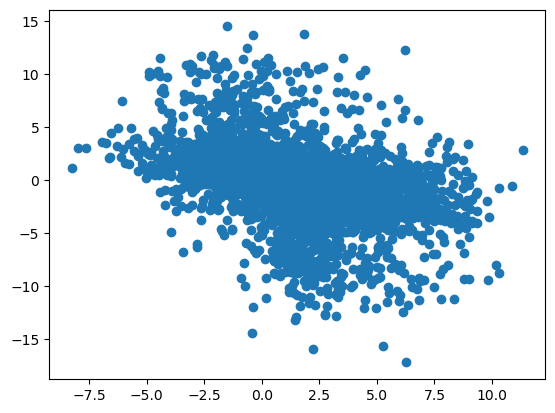

In [105]:
result, output_df= calculate_spearman_coefficient(merged_df, methods, 'ESM Score',  'deltaG')
plt.scatter(output_df['ESM Score'] - output_df['ESM Score_other'], output_df['deltaG'] - output_df['deltaG_other'])
print(result)

0.4446024726656694


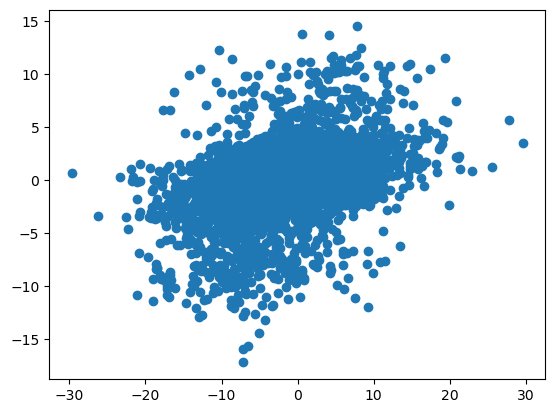

In [ ]:
result, output_df= calculate_spearman_coefficient(merged_df, methods, 'Half Masked ESMFold Average Plddt',  'deltaG')
plt.scatter(output_df['Half Masked ESMFold Average Plddt'] - output_df['Half Masked ESMFold Average Plddt_other'], output_df['deltaG'] - output_df['deltaG_other'])
print(result)

In [109]:
# merged_df['Hybrid Composite Score_2'] = merged_df['ESM Score']/merged_df['conditional_CE']

0.5069719670459362


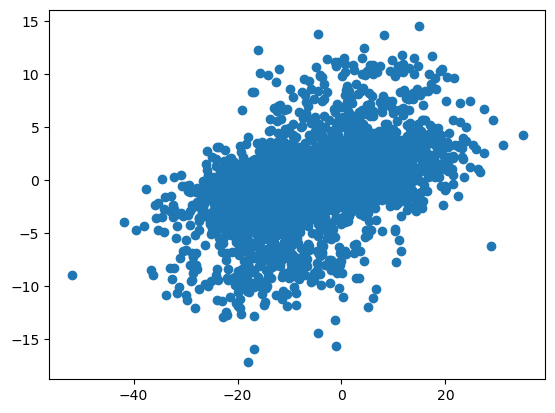

In [103]:
result, output_df= calculate_spearman_coefficient(merged_df, methods, 'Hybrid Composite Score',  'deltaG')
plt.scatter(output_df['Hybrid Composite Score'] - output_df['Hybrid Composite Score_other'], output_df['deltaG'] - output_df['deltaG_other'])
print(result)

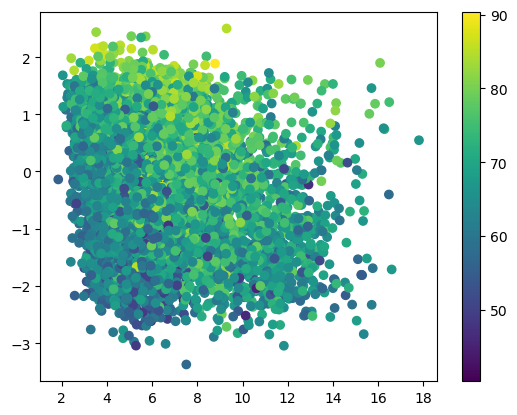

In [39]:
result, output_df= calculate_spearman_coefficient(merged_df, methods, 'ESM Score',  'log10_K50_c')
plt.scatter(merged_df['ESM Score'] , merged_df['log10_K50_c'], c= merged_df['Half Masked ESMFold Average Plddt'])
plt.colorbar()

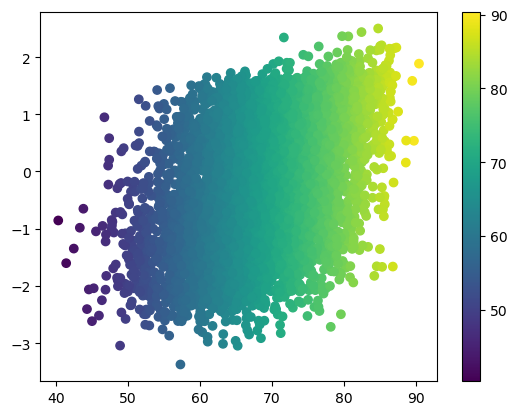

In [87]:
plt.scatter(merged_df['Half Masked ESMFold Average Plddt'] , merged_df['log10_K50_c'], c= merged_df['Half Masked ESMFold Average Plddt'])
plt.colorbar()

Spearman Correlation Coefficient: 0.4278342426389184


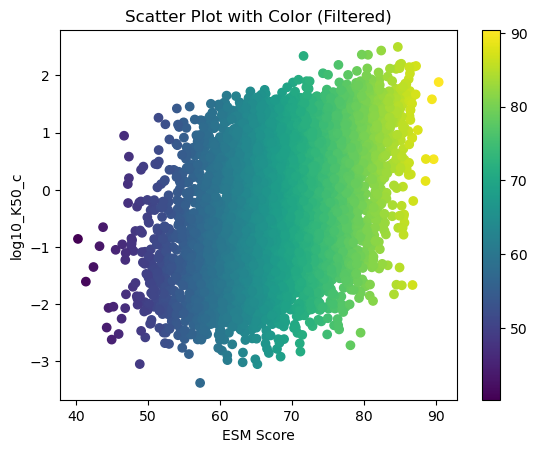

In [86]:
import matplotlib.pyplot as plt

# Filter the DataFrame based on the condition
filtered_df = merged_df[merged_df['Half Masked ESMFold Average Plddt'] > 70]


# Scatter plot with color based on 'Half Masked ESMFold Average Plddt'
plt.scatter(merged_df['Half Masked ESMFold Average Plddt'], merged_df['log10_K50_c'], c=merged_df['Half Masked ESMFold Average Plddt'])
plt.colorbar()

# Adding labels and title
plt.xlabel('ESM Score')
plt.ylabel('log10_K50_c')
plt.title('Scatter Plot with Color (Filtered)')

# Show the plot

spearman_coefficient, _ = spearmanr(merged_df['Half Masked ESMFold Average Plddt'], merged_df['log10_K50_c'])

# Print the result
print(f"Spearman Correlation Coefficient: {spearman_coefficient}")


plt.show()

In [78]:
import numpy as np
import matplotlib.pyplot as plt

num_groups = 5
bar_width = 0.1
index = np.arange(num_groups)

# Rainbow colormap
dd_s = [log10_K50_t_s, log10_K50_c_s, deltaG_t_s, deltaG_c_s, delta_G_s]
dd_s = np.abs(np.array(dd_s))

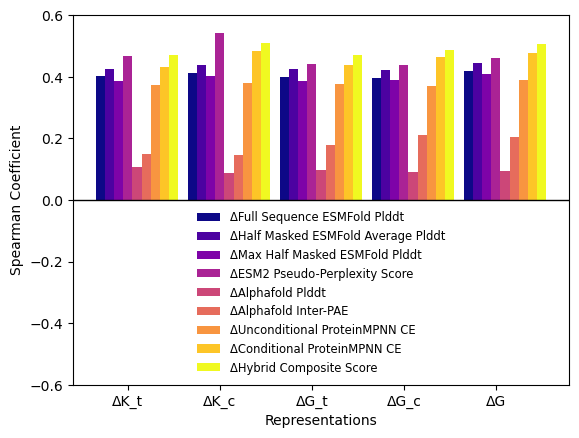

In [112]:

# colors = plt.cm.rainbow(np.linspace(1, 0, 9))
colors = plt.cm.plasma(np.linspace(0, 1, 9))
# colors[-1] = [0.5, 0.5, 0.5, 1.0]

# Create grouped bar graph with pastel colors
plt.bar(index - 3 * bar_width, dd_s[:, 0], bar_width, label='ΔFull Sequence ESMFold Plddt', color =colors[0])
plt.bar(index - 2 * bar_width, dd_s[:, 1], bar_width, label='ΔHalf Masked ESMFold Average Plddt', color =colors[1])
plt.bar(index - bar_width, dd_s[:, 2], bar_width, label='ΔMax Half Masked ESMFold Plddt', color =colors[2])
plt.bar(index, dd_s[:, 3], bar_width, label='ΔESM2 Pseudo-Perplexity Score', color =colors[3])
plt.bar(index+bar_width, dd_s[:, 4], bar_width, label='ΔAlphafold Plddt', color =colors[4])
plt.bar(index + 2*bar_width, dd_s[:, 5], bar_width, label='ΔAlphafold Inter-PAE', color =colors[5])
plt.bar(index+3*bar_width, dd_s[:, 6], bar_width, label='ΔUnconditional ProteinMPNN CE', color =colors[6])
plt.bar(index + 4*bar_width, dd_s[:, 7], bar_width, label='ΔConditional ProteinMPNN CE', color =colors[7])
plt.bar(index + 5*bar_width, dd_s[:, 8], bar_width, label='ΔHybrid Composite Score', color =colors[8])

plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Customize the plot
plt.xlabel('Representations')
plt.ylabel('Spearman Coefficient')
plt.ylim([-0.6, 0.6])
# plt.title('Grouped Bar Graph for Different Stability Factors')
plt.xticks(index, ['ΔK_t', 'ΔK_c', 'ΔG_t', 'ΔG_c', 'ΔG'])
plt.legend(loc="lower center", fontsize="small",  frameon = False)

# plt.savefig('figures/models_delta_spearman_coefficient_plasma.png',  dpi=300)
# Show the plot

plt.show()


## correlation based on filtering 

In [130]:
df= pd.read_csv('dataset_final/all_4.csv')

In [172]:
filtered_df = df[(df['AF_plddt']>70)&(df['inter_pae']>15)]
filtered_df_2 = df[(df['AF_plddt']>70)&(df['inter_pae']>15) & (df['Full Seq PLDDT']>70)]

Spearman Correlation Coefficient: 0.2566564559953141


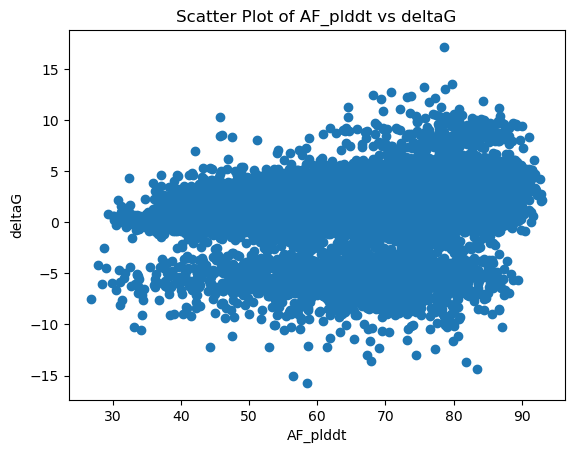

Spearman Correlation Coefficient: 0.07604514920587084


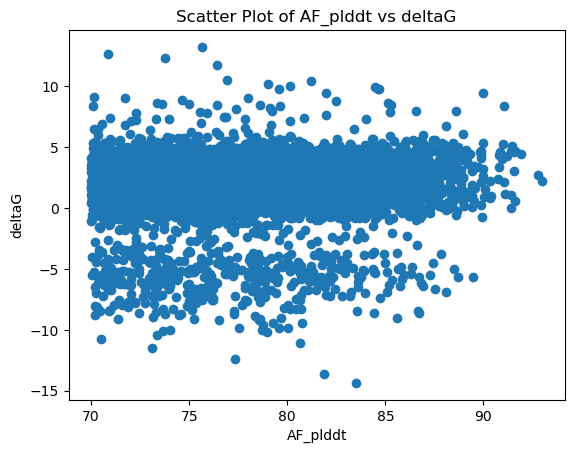

Spearman Correlation Coefficient: 0.06260033715750488


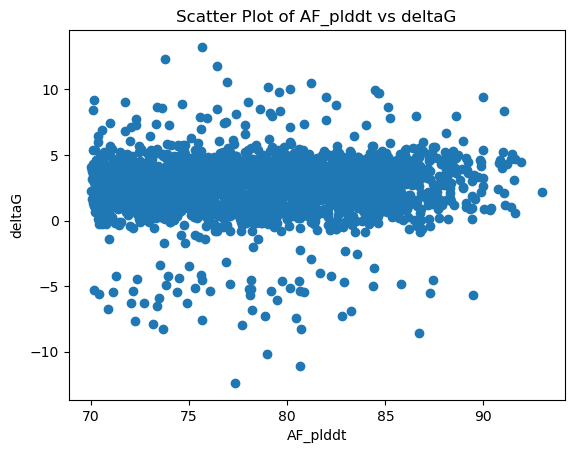

In [173]:


plt.scatter(df['AF_plddt'].tolist(), df['deltaG'].tolist())
plt.xlabel('AF_plddt')
plt.ylabel('deltaG')
plt.title('Scatter Plot of AF_plddt vs deltaG')

# Calculate Spearman correlation coefficient
spearman_coeff, _ = pearsonr(df['AF_plddt'], df['deltaG'])
print(f"Spearman Correlation Coefficient: {spearman_coeff}")

# Show the plot
plt.show()


plt.scatter(filtered_df['AF_plddt'].tolist(), filtered_df['deltaG'].tolist())
plt.xlabel('AF_plddt')
plt.ylabel('deltaG')
plt.title('Scatter Plot of AF_plddt vs deltaG')

# Calculate Spearman correlation coefficient
spearman_coeff, _ = spearmanr(filtered_df['AF_plddt'], filtered_df['deltaG'])
print(f"Spearman Correlation Coefficient: {spearman_coeff}")

# Show the plot
plt.show()


plt.scatter(filtered_df_2['AF_plddt'].tolist(), filtered_df_2['deltaG'].tolist())
plt.xlabel('AF_plddt')
plt.ylabel('deltaG')
plt.title('Scatter Plot of AF_plddt vs deltaG')

# Calculate Spearman correlation coefficient
spearman_coeff, _ = spearmanr(filtered_df_2['AF_plddt'], filtered_df_2['deltaG'])
print(f"Spearman Correlation Coefficient: {spearman_coeff}")

# Show the plot
plt.show()

Spearman Correlation Coefficient: -0.2667640014712406


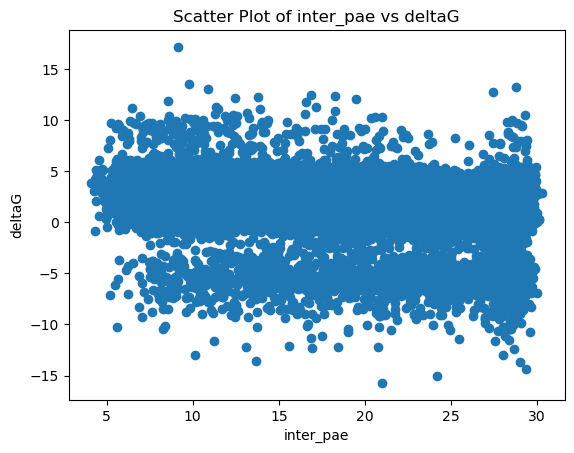

Spearman Correlation Coefficient: -0.198302245614579


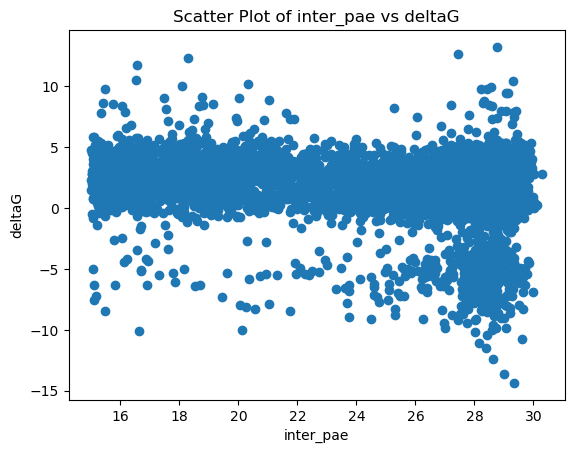

Spearman Correlation Coefficient: -0.1603389954012803


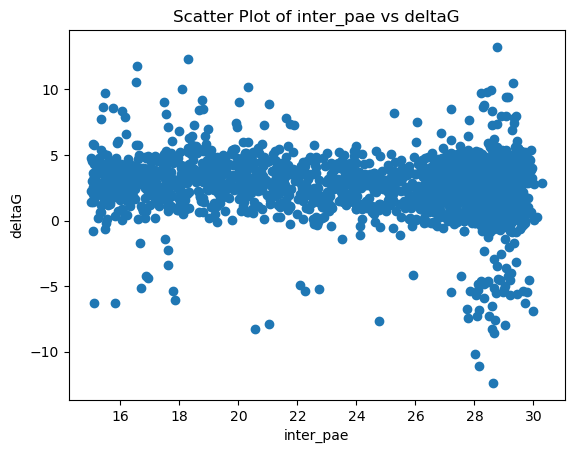

In [174]:
plt.scatter(df['inter_pae'].tolist(), df['deltaG'].tolist())
plt.xlabel('inter_pae')
plt.ylabel('deltaG')
plt.title('Scatter Plot of inter_pae vs deltaG')

# Calculate Spearman correlation coefficient
spearman_coeff, _ = spearmanr(df['inter_pae'], df['deltaG'])
print(f"Spearman Correlation Coefficient: {spearman_coeff}")

# Show the plot
plt.show()



plt.scatter(filtered_df['inter_pae'].tolist(), filtered_df['deltaG'].tolist())
plt.xlabel('inter_pae')
plt.ylabel('deltaG')
plt.title('Scatter Plot of inter_pae vs deltaG')

# Calculate Spearman correlation coefficient
spearman_coeff, _ = spearmanr(filtered_df['inter_pae'], filtered_df['deltaG'])
print(f"Spearman Correlation Coefficient: {spearman_coeff}")

# Show the plot
plt.show()


plt.scatter(filtered_df_2['inter_pae'].tolist(), filtered_df_2['deltaG'].tolist())
plt.xlabel('inter_pae')
plt.ylabel('deltaG')
plt.title('Scatter Plot of inter_pae vs deltaG')

# Calculate Spearman correlation coefficient
spearman_coeff, _ = spearmanr(filtered_df_2['inter_pae'], filtered_df_2['deltaG'])
print(f"Spearman Correlation Coefficient: {spearman_coeff}")

# Show the plot
plt.show()

Spearman Correlation Coefficient: 0.4945627371716675


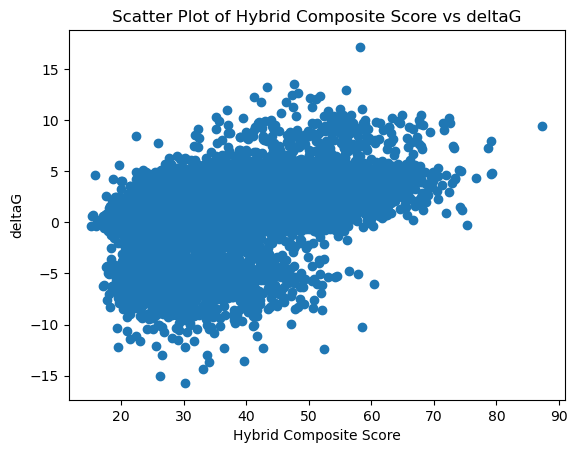

Spearman Correlation Coefficient: 0.4871277554390244


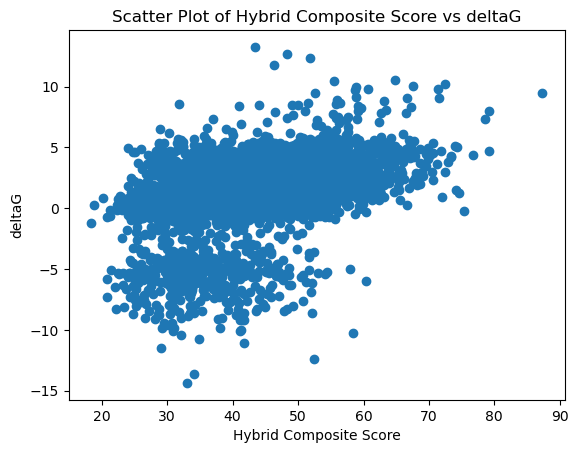

Spearman Correlation Coefficient: 0.3413124389028548


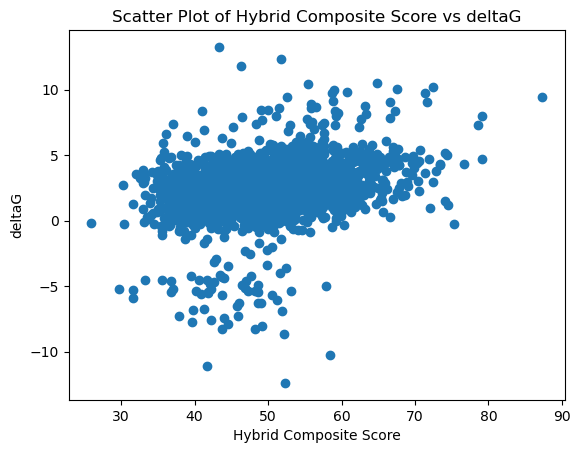

In [175]:
plt.scatter(df['Hybrid Composite Score'].tolist(), df['deltaG'].tolist())
plt.xlabel('Hybrid Composite Score')
plt.ylabel('deltaG')
plt.title('Scatter Plot of Hybrid Composite Score vs deltaG')

# Calculate Spearman correlation coefficient
spearman_coeff, _ = spearmanr(df['Hybrid Composite Score'], df['deltaG'])
print(f"Spearman Correlation Coefficient: {spearman_coeff}")

# Show the plot
plt.show()



plt.scatter(filtered_df['Hybrid Composite Score'].tolist(), filtered_df['deltaG'].tolist())
plt.xlabel('Hybrid Composite Score')
plt.ylabel('deltaG')
plt.title('Scatter Plot of Hybrid Composite Score vs deltaG')

# Calculate Spearman correlation coefficient
spearman_coeff, _ = spearmanr(filtered_df['Hybrid Composite Score'], filtered_df['deltaG'])
print(f"Spearman Correlation Coefficient: {spearman_coeff}")

# Show the plot
plt.show()

plt.scatter(filtered_df_2['Hybrid Composite Score'].tolist(), filtered_df_2['deltaG'].tolist())
plt.xlabel('Hybrid Composite Score')
plt.ylabel('deltaG')
plt.title('Scatter Plot of Hybrid Composite Score vs deltaG')

# Calculate Spearman correlation coefficient
spearman_coeff, _ = spearmanr(filtered_df_2['Hybrid Composite Score'], filtered_df_2['deltaG'])
print(f"Spearman Correlation Coefficient: {spearman_coeff}")

# Show the plot
plt.show()


Spearman Correlation Coefficient: -0.3382878621648842


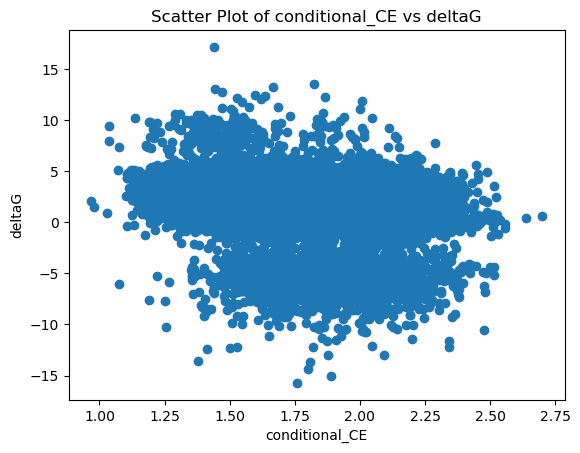

Spearman Correlation Coefficient: -0.3497628246004325


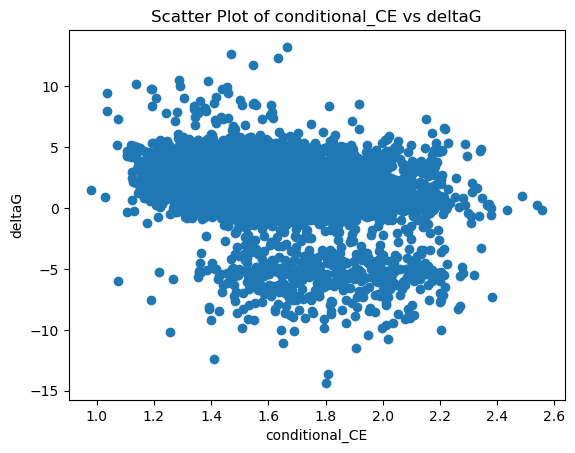

Spearman Correlation Coefficient: -0.24712220616706676


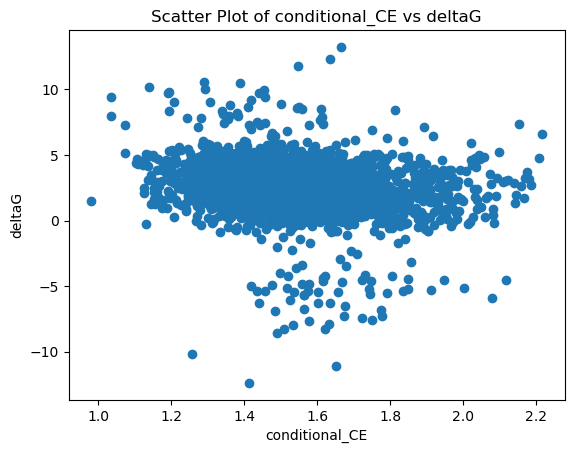

In [176]:
plt.scatter(df['conditional_CE'].tolist(), df['deltaG'].tolist())
plt.xlabel('conditional_CE')
plt.ylabel('deltaG')
plt.title('Scatter Plot of conditional_CE vs deltaG')

# Calculate Spearman correlation coefficient
spearman_coeff, _ = spearmanr(df['conditional_CE'], df['deltaG'])
print(f"Spearman Correlation Coefficient: {spearman_coeff}")

# Show the plot
plt.show()



plt.scatter(filtered_df['conditional_CE'].tolist(), filtered_df['deltaG'].tolist())
plt.xlabel('conditional_CE')
plt.ylabel('deltaG')
plt.title('Scatter Plot of conditional_CE vs deltaG')

# Calculate Spearman correlation coefficient
spearman_coeff, _ = spearmanr(filtered_df['conditional_CE'], filtered_df['deltaG'])
print(f"Spearman Correlation Coefficient: {spearman_coeff}")

# Show the plot
plt.show()



plt.scatter(filtered_df_2['conditional_CE'].tolist(), filtered_df_2['deltaG'].tolist())
plt.xlabel('conditional_CE')
plt.ylabel('deltaG')
plt.title('Scatter Plot of conditional_CE vs deltaG')

# Calculate Spearman correlation coefficient
spearman_coeff, _ = spearmanr(filtered_df_2['conditional_CE'], filtered_df_2['deltaG'])
print(f"Spearman Correlation Coefficient: {spearman_coeff}")

# Show the plot
plt.show()

Spearman Correlation Coefficient: -0.1149539961649091


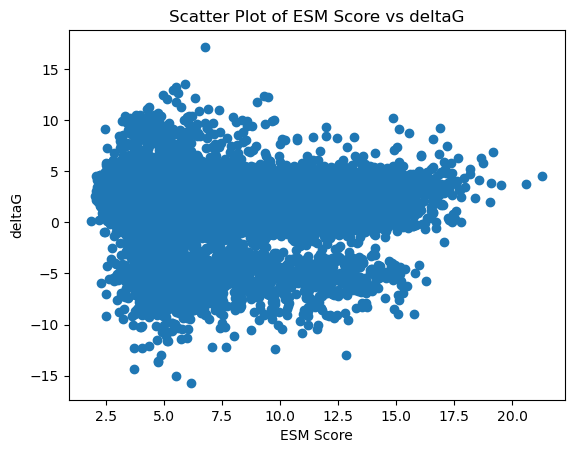

Spearman Correlation Coefficient: -0.13462748785490186


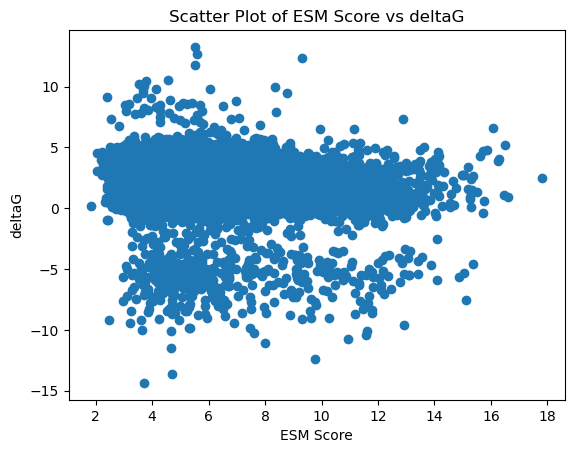

Spearman Correlation Coefficient: -0.30155847877604397


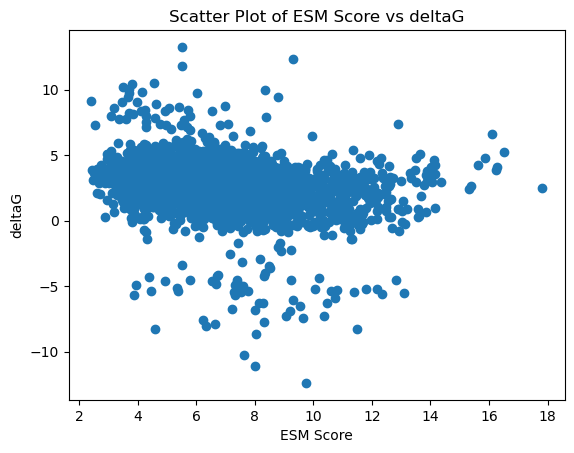

In [177]:
plt.scatter(df['ESM Score'].tolist(), df['deltaG'].tolist())
plt.xlabel('ESM Score')
plt.ylabel('deltaG')
plt.title('Scatter Plot of ESM Score vs deltaG')

# Calculate Spearman correlation coefficient
spearman_coeff, _ = spearmanr(df['ESM Score'], df['deltaG'])
print(f"Spearman Correlation Coefficient: {spearman_coeff}")

# Show the plot
plt.show()



plt.scatter(filtered_df['ESM Score'].tolist(), filtered_df['deltaG'].tolist())
plt.xlabel('ESM Score')
plt.ylabel('deltaG')
plt.title('Scatter Plot of ESM Score vs deltaG')

# Calculate Spearman correlation coefficient
spearman_coeff, _ = spearmanr(filtered_df['ESM Score'], filtered_df['deltaG'])
print(f"Spearman Correlation Coefficient: {spearman_coeff}")

# Show the plot
plt.show()


plt.scatter(filtered_df_2['ESM Score'].tolist(), filtered_df_2['deltaG'].tolist())
plt.xlabel('ESM Score')
plt.ylabel('deltaG')
plt.title('Scatter Plot of ESM Score vs deltaG')

# Calculate Spearman correlation coefficient
spearman_coeff, _ = spearmanr(filtered_df_2['ESM Score'], filtered_df_2['deltaG'])
print(f"Spearman Correlation Coefficient: {spearman_coeff}")

# Show the plot
plt.show()